 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








##Part-1

<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



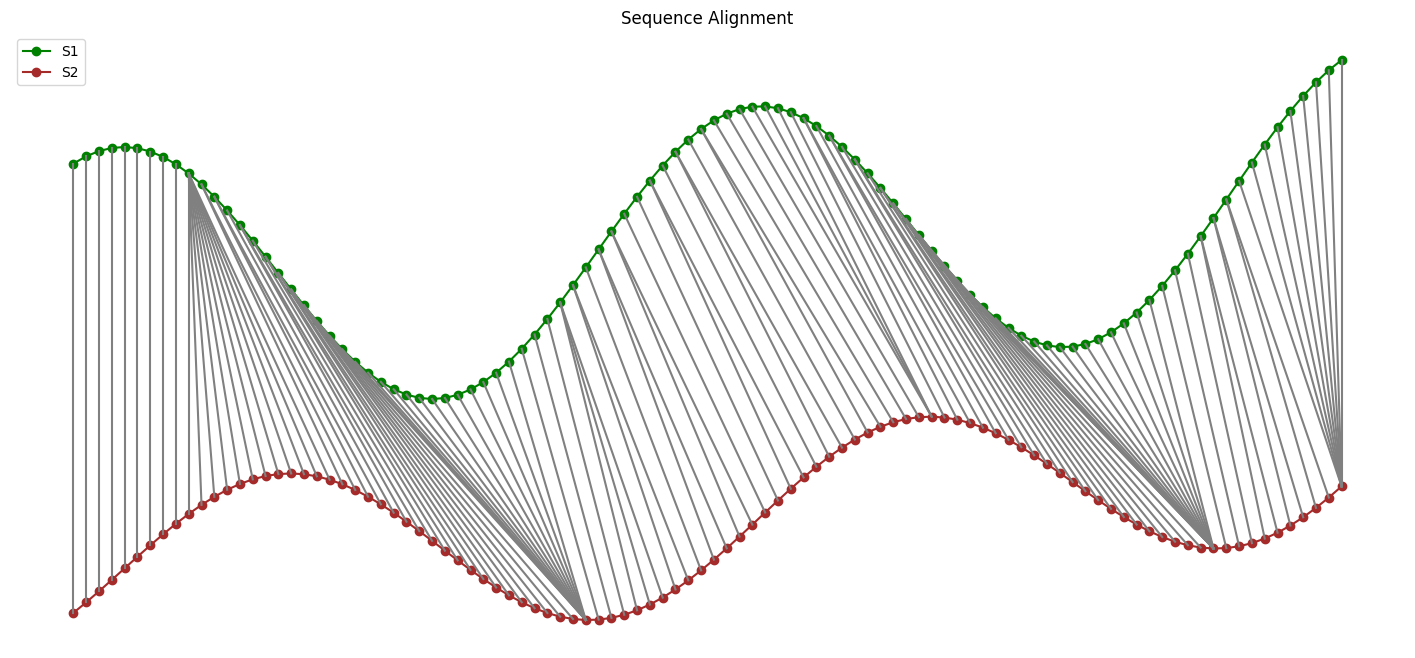

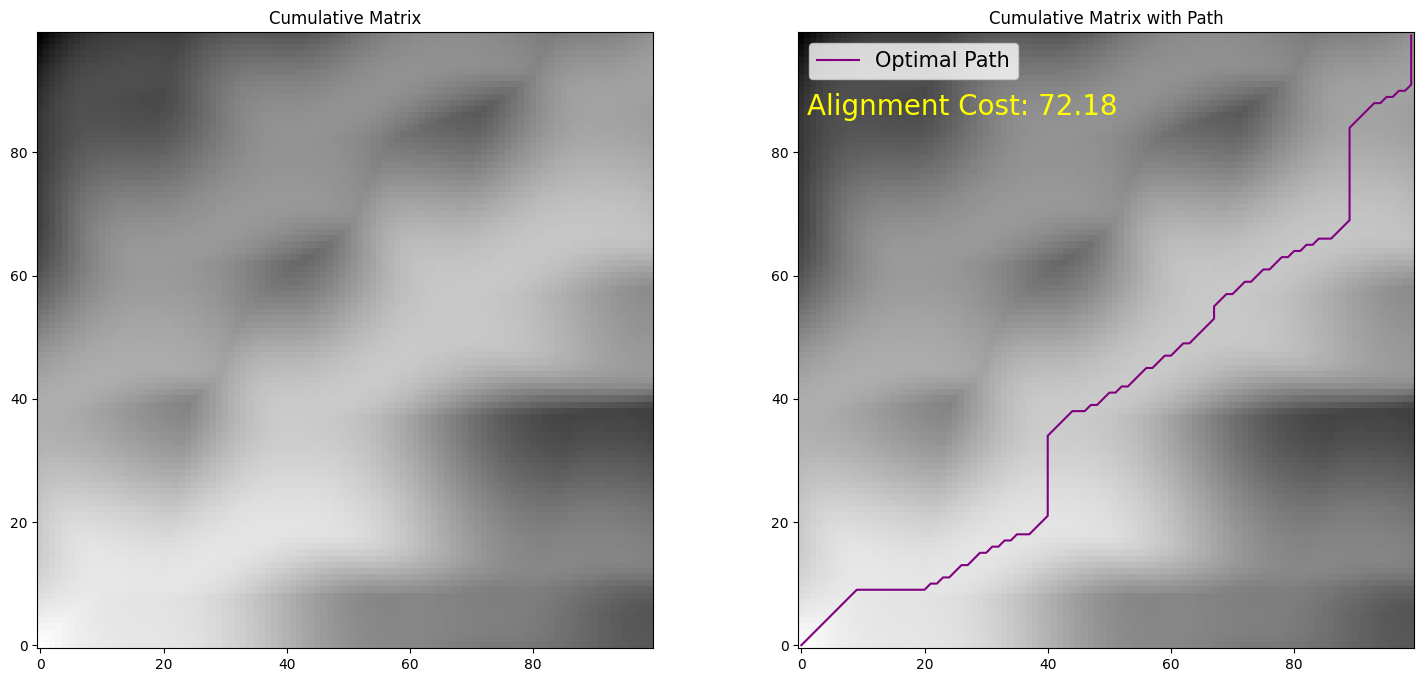

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(sequence1, sequence2):
    n = len(sequence1)
    m = len(sequence2)

    DTW_cumulate_Matrix = np.zeros((n + 1, m + 1))  # Cumulative distance matrix
    DTW_cumulate_Matrix[0, 1:] = np.inf
    DTW_cumulate_Matrix[1:, 0] = np.inf

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            current_distance = abs(sequence1[i - 1] - sequence2[j - 1])
            penalty = min(DTW_cumulate_Matrix[i - 1, j],
                          DTW_cumulate_Matrix[i - 1, j - 1],
                          DTW_cumulate_Matrix[i, j - 1])
            DTW_cumulate_Matrix[i, j] = current_distance + penalty  # Associated penalty

    opt_distance = DTW_cumulate_Matrix[n, m]
    i, j = n, m  # Starting from the bottom-right corner
    path = [(i - 1, j - 1)]

    while i != 1 or j != 1:
        # Prefer diagonal move in case of tie
        if i > 1 and j > 1 and DTW_cumulate_Matrix[i - 1, j - 1] == min(DTW_cumulate_Matrix[i - 1, j - 1],
                                                                          DTW_cumulate_Matrix[i - 1, j],
                                                                          DTW_cumulate_Matrix[i, j - 1]):
            i -= 1
            j -= 1
        # Prefer upward move
        elif i > 1 and DTW_cumulate_Matrix[i - 1, j] == min(DTW_cumulate_Matrix[i - 1, j], DTW_cumulate_Matrix[i, j - 1]):
            i -= 1
        # Prefer leftward move
        else:
            j -= 1
        path.append((i - 1, j - 1))
    path.reverse()

    return opt_distance, DTW_cumulate_Matrix[1:, 1:], path

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################




def plotDTWpath(sequence1, sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    # Compute distance and cumulative distance between the given templates
    optimal_dist, matrix, path = DTW(sequence1, sequence2)

    # Obtain the optimal path using "DTW" function
    plt.figure(figsize=(18, 8))
    plt.plot(np.arange(sequence1.shape[0]), sequence1 + 2.5, "-o", c="green", label='S1') #offset needed 1.5 for clear visibilty
    plt.plot(np.arange(sequence2.shape[0]), sequence2 - 2.5, "-o", c="brown", label='S2') #offset needed 1.5 for clear visibilty
    plt.axis("off")
    # plt.grid()
    plt.title('Sequence Alignment')
    plt.legend()
    plt.plot()
    for xi, yj in path:
        plt.plot([xi, yj], [sequence1[xi] + 2.5, sequence2[yj] - 2.5], c="gray")  #offset needed 1.5 for clear visibilty
    # Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    # print("Alignment Cost: ",optimal_dist)

    #plotting of the matrix with path
    plt.figure(figsize=(18,8))
    plt.subplot(121)
    plt.title('Cumulative Matrix')
    plt.imshow(matrix, cmap=plt.cm.binary, origin='lower')
    plt.subplot(122)
    plt.title('Cumulative Matrix with Path')
    plt.imshow(matrix, cmap=plt.cm.binary, origin='lower')
    xpath, ypath = zip(*path)
    plt.plot(ypath,xpath,c='purple',label='Optimal Path')
    test_x = 0.01*matrix.shape[1]
    test_y = 0.86*matrix.shape[0]
    plt.text(test_x, test_y, f"Alignment Cost: {np.round(optimal_dist,2)}",c='yellow',fontsize=20)
    plt.legend(loc='upper left',fontsize=15)
    plt.show()


# testing
t = np.linspace(-2*np.pi, 2*np.pi, 100)
f = np.linspace(0, 1, 100)
x = np.sin(t) + 2*np.cos(t) + np.exp(f)
y = np.sin(t+5) + np.cos(t+5) + np.exp(f+0.2)
plotDTWpath(x,y)

<b> Observations on Dynamic time Warping</b>

1. From the sequence alignment plot it can be clearly inferred that the algorithm performs very well to align the two sequences.

2. However, there is a cost assocaited with this alignment , lesser is this cost more similar / same the two sequences will be.

3. Also, this base version of Dynamic Time Warping is very slow and ```involves high computations```, so there are some faster version of this algorithm present in the literature.

4. The cummulative matrix provides us a more clear picture of how the algorithm finds it's way to the best possible path.

5. The dark regions shows the more ```expensive paths``` that the algorithm tries to avoid as much as possible.

6. Another, thing to observe is that more the path is aligned to the diagonal better is the alignment of the two sequences and leaser is the ```Alignment cost```.



##Part-2


<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [1]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
# from matplotlib import pyplot as plt
# import numpy as np
# import scipy.io.wavfile
# import io
# import os
# from IPython.display import Audio

# #### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
# !rm recording.wav

# #### You can run this module in the loop to record more repetitions of the digits.
# if os.path.isfile('recording.wav'):
#     print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
# else:
#     print("Recording the digits")
#     wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
#     wav = wav.set_frame_rate(16000)
#     sig=wav.get_array_of_samples()
#     samples=np.array(sig).T.astype(np.float32)
#     fp_arr = np.array(samples).T.astype(np.float32)
#     fp_arr /= np.iinfo(sig.typecode).max
#     scipy.io.wavfile.write('recording.wav', 16000, fp_arr) #Please change the name.

# wn = Audio('recording.wav', autoplay=True)
# display(wn)

**Algorithm to perform isolated digit recognition**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

def VectorDTW(sequence1, sequence2, distance_metric='euclidean'):
    n = len(sequence1)
    m = len(sequence2)
    DTW_cumulate_Matrix = np.zeros((n, m))

    # Compute the pairwise Euclidean distance between frames
    for i in range(n):
        for j in range(m):
            if distance_metric == 'euclidean':
                dist = np.linalg.norm(sequence1[i] - sequence2[j])
            elif distance_metric == 'manhattan':
                dist = np.sum(np.abs(sequence1[i] - sequence2[j]))
            DTW_cumulate_Matrix[i, j] = dist

    # Initialize the first row and column of the cumulative distance matrix
    # for i in range(1, n):
    #     DTW_cumulate_Matrix[i, 0] += DTW_cumulate_Matrix[i - 1, 0]
    # for j in range(1, m):
    #     DTW_cumulate_Matrix[0, j] += DTW_cumulate_Matrix[0, j - 1]
    DTW_cumulate_Matrix[0, 1:] = np.inf
    DTW_cumulate_Matrix[1:, 0] = np.inf

    # Fill in the rest of the matrix
    for i in range(1, n):
        for j in range(1, m):
            DTW_cumulate_Matrix[i, j] += min(
                DTW_cumulate_Matrix[i - 1, j],
                DTW_cumulate_Matrix[i - 1, j - 1],
                DTW_cumulate_Matrix[i, j - 1]
            )

    # Backtrack to find the optimal path
    path = []
    i, j = n - 1, m - 1
    while i != 0 or j != 0:
        # Preferring Diagonal move in case of tie
        if i > 0 and j > 0 and DTW_cumulate_Matrix[i - 1, j - 1] == min(DTW_cumulate_Matrix[i - 1, j - 1],
                                                                         DTW_cumulate_Matrix[i - 1, j],
                                                                         DTW_cumulate_Matrix[i, j - 1]):
            i = i - 1
            j = j - 1
        # Preferring Up move
        elif i > 0 and DTW_cumulate_Matrix[i - 1, j] == min(DTW_cumulate_Matrix[i - 1, j], DTW_cumulate_Matrix[i, j - 1]):
            i = i - 1
        # Preferring Left move
        else:
            j = j - 1
        path.append((i, j))

    # Reverse the path to start from (0, 0)
    path.reverse()

    # # Plot the DTW path
    # plt.imshow(DTW_cumulate_Matrix, origin='lower', cmap='binary', aspect='auto', interpolation='nearest')
    # plt.plot([x[1] for x in path], [x[0] for x in path], color='purple')
    # plt.show()
    # return DTW_cumulate_Matrix[1:, 1:], DTW_cumulate_Matrix[-1, -1] / len(path), path
    return DTW_cumulate_Matrix[1:, 1:], DTW_cumulate_Matrix[-1, -1] / len(path), path

**My Recordings (TRAINING-REFRENCE AUDIO)**

In [3]:
from google.colab import drive
import os
from pydub import AudioSegment
from IPython.display import Audio, display
import time
import librosa
import numpy as np
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy


def extract_mfcc(audio_path, n_mfcc=13):
    # Load audio file
    (rate, sig) = wav.read(audio_path)

    # Preprocess the signal
    sig = sig - np.mean(sig)

    # Extract MFCC features
    mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)

    # Apply cepstral mean and variance normalization (CMVN)
    mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)

    return mfcc_feat_cmvn

my_refrence=[]
# Load the dataset
drive.mount('/content/drive', force_remount=True)
mypath = "/content/drive/MyDrive/PRML_Assignments/Assignment_5"

# Iterate over the files and play them sequentially
for i in range(0,10):
    # Load the m4a file
    # Path to the WAV file
    wav_path = os.path.join(mypath, f"digit-{i}.wav")
    my_refrence.append(extract_mfcc(wav_path))

  Preparing metadata (setup.py) ... done
Mounted at /content/drive


In [4]:
# Load the dataset
drive.mount('/content/drive', force_remount=True)
mypath = "/content/drive/MyDrive/PRML_Assignments/Assignment_5/part2_test"

my_zero_test=[]
for i in range(1,5):
    # m4a_path = os.path.join(mypath, f"zero_{i}.m4a")
    # audio = AudioSegment.from_file(m4a_path, format="m4a")
    wav_path = os.path.join(mypath, f"zero_{i}.wav")
    # audio.export(wav_path, format="wav")
    my_zero_test.append(extract_mfcc(wav_path))

my_one_test=[]
for i in range(1,5):
    # m4a_path = os.path.join(mypath, f"one_{i}.m4a")
    # audio = AudioSegment.from_file(m4a_path, format="m4a")
    wav_path = os.path.join(mypath, f"one_{i}.wav")
    # audio.export(wav_path, format="wav")
    my_one_test.append(extract_mfcc(wav_path))

my_two_test=[]
for i in range(1,5):
    # m4a_path = os.path.join(mypath, f"two_{i}.m4a")
    # audio = AudioSegment.from_file(m4a_path, format="m4a")
    wav_path = os.path.join(mypath, f"two_{i}.wav")
    # audio.export(wav_path, format="wav")
    my_two_test.append(extract_mfcc(wav_path))

my_three_test=[]
for i in range(1,5):
    # m4a_path = os.path.join(mypath, f"three_{i}.m4a")
    # audio = AudioSegment.from_file(m4a_path, format="m4a")
    wav_path = os.path.join(mypath, f"three_{i}.wav")
    # audio.export(wav_path, format="wav")
    my_three_test.append(extract_mfcc(wav_path))

my_four_test=[]
for i in range(1,5):
    # m4a_path = os.path.join(mypath, f"four_{i}.m4a")
    # audio = AudioSegment.from_file(m4a_path, format="m4a")
    wav_path = os.path.join(mypath, f"four_{i}.wav")
    # audio.export(wav_path, format="wav")
    my_four_test.append(extract_mfcc(wav_path))

my_five_test=[]
for i in range(1,5):
    # m4a_path = os.path.join(mypath, f"five_{i}.m4a")
    # audio = AudioSegment.from_file(m4a_path, format="m4a")
    wav_path = os.path.join(mypath, f"five_{i}.wav")
    # audio.export(wav_path, format="wav")
    my_five_test.append(extract_mfcc(wav_path))

my_six_test=[]
for i in range(1,5):
    # m4a_path = os.path.join(mypath, f"six_{i}.m4a")
    # audio = AudioSegment.from_file(m4a_path, format="m4a")
    wav_path = os.path.join(mypath, f"six_{i}.wav")
    # audio.export(wav_path, format="wav")
    my_six_test.append(extract_mfcc(wav_path))

my_seven_test=[]
for i in range(1,5):
    # m4a_path = os.path.join(mypath, f"seven_{i}.m4a")
    # audio = AudioSegment.from_file(m4a_path, format="m4a")
    wav_path = os.path.join(mypath, f"seven_{i}.wav")
    # audio.export(wav_path, format="wav")
    my_seven_test.append(extract_mfcc(wav_path))

my_eight_test=[]
for i in range(1,5):
    # m4a_path = os.path.join(mypath, f"eight_{i}.m4a")
    # audio = AudioSegment.from_file(m4a_path, format="m4a")
    wav_path = os.path.join(mypath, f"eight_{i}.wav")
    # audio.export(wav_path, format="wav")
    my_eight_test.append(extract_mfcc(wav_path))

my_nine_test=[]
for i in range(1,5):
    # m4a_path = os.path.join(mypath, f"nine_{i}.m4a")
    # audio = AudioSegment.from_file(m4a_path, format="m4a")
    wav_path = os.path.join(mypath, f"nine_{i}.wav")
    # audio.export(wav_path, format="wav")
    my_nine_test.append(extract_mfcc(wav_path))

Mounted at /content/drive


**SAME DIGIT CASE**

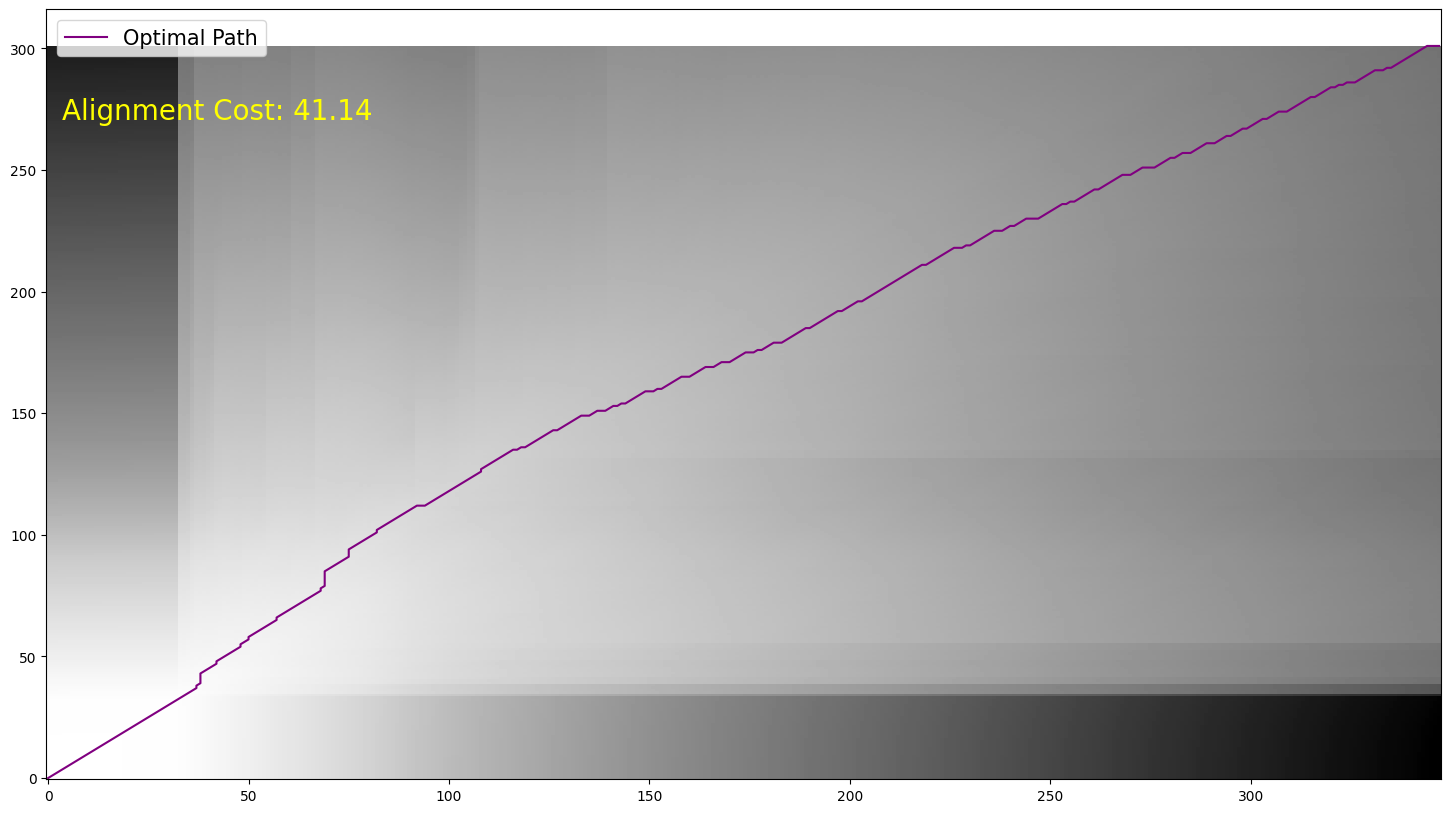

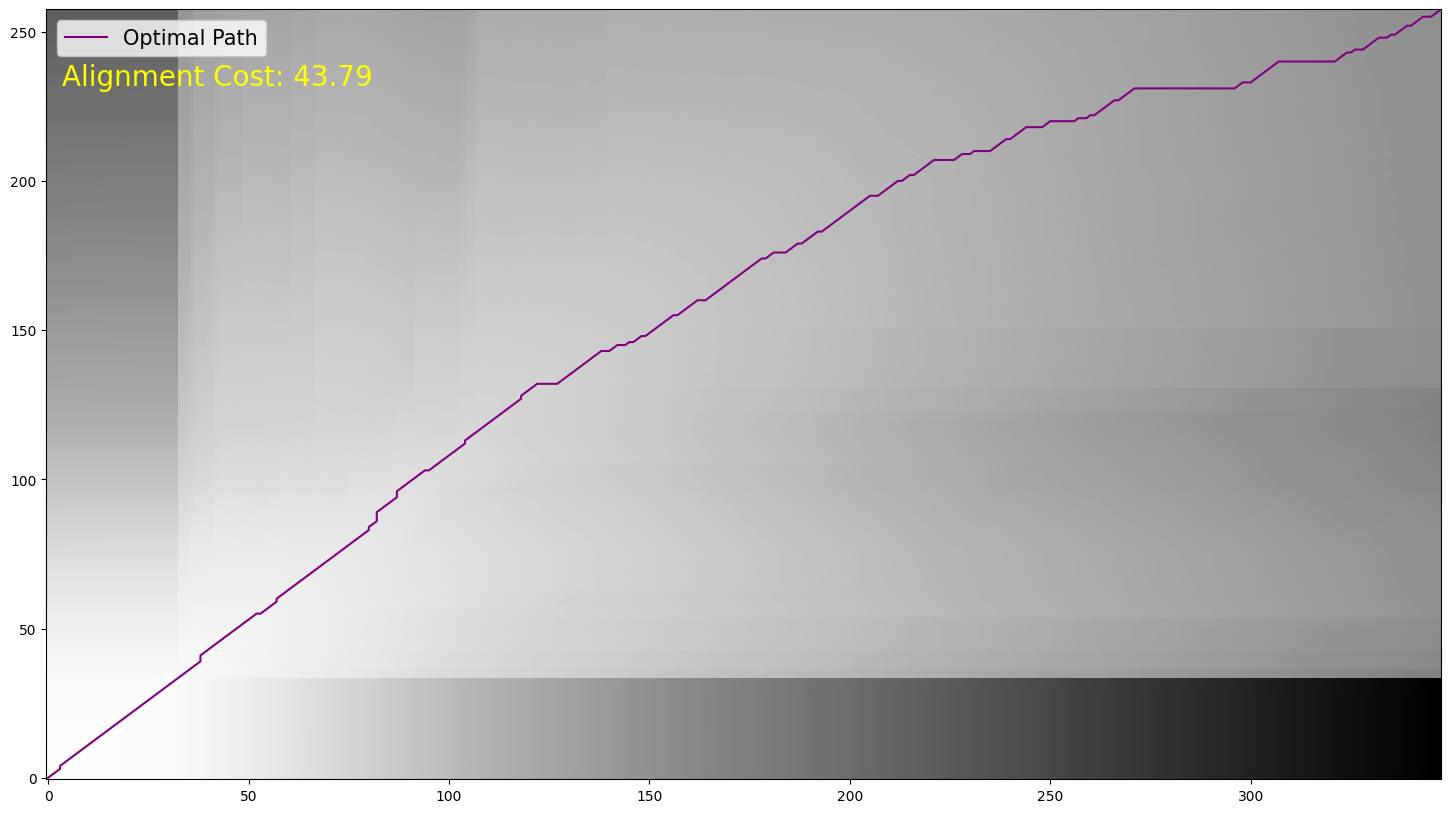

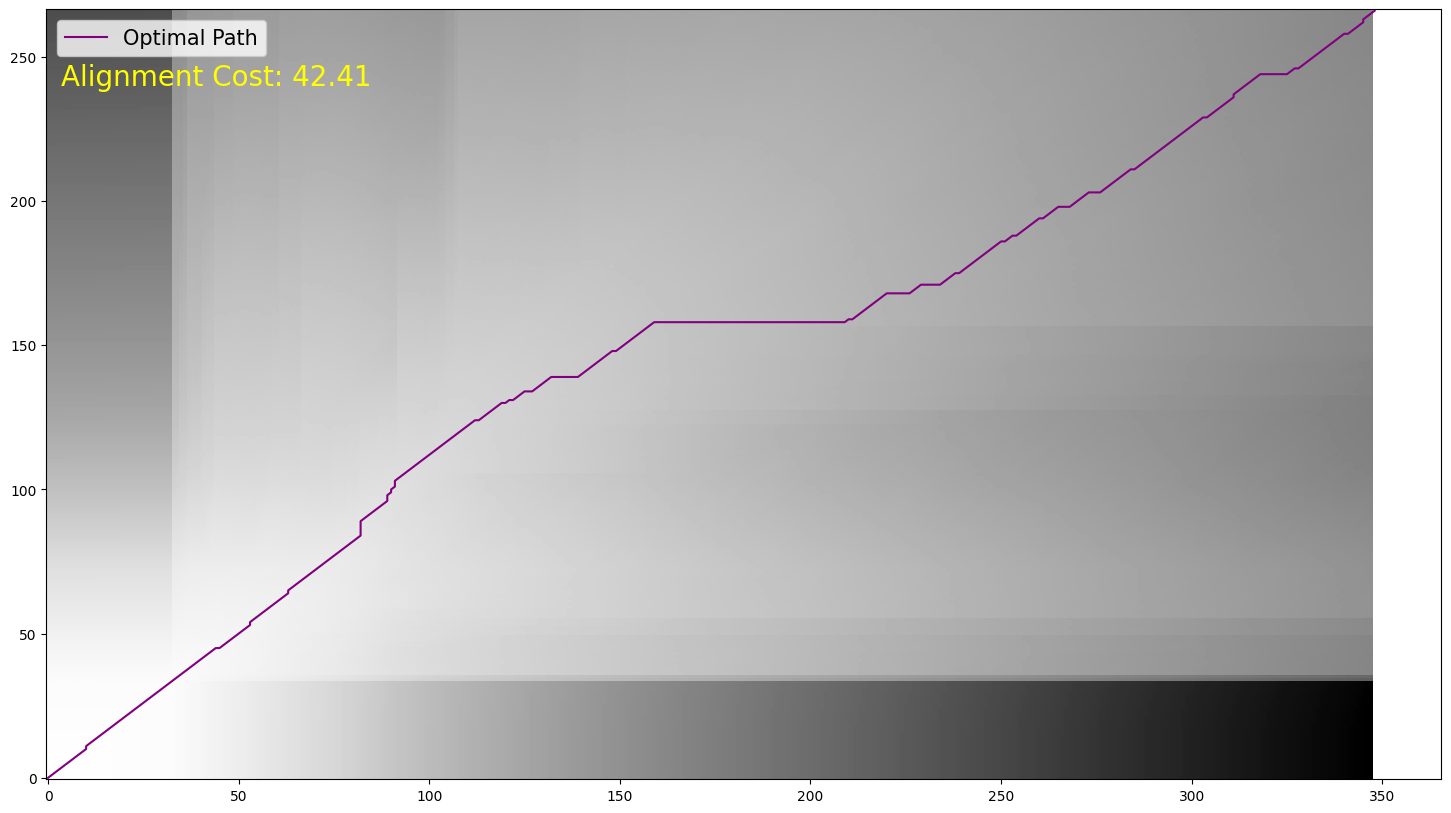

In [ ]:
# Mapping of the same digits: ####### DIGIT: 0 ######
for i in range(len(my_zero_test)-1):
    matrix, dist, path = VectorDTW(my_zero_test[i+1], my_zero_test[0])
    # Plot the DTW path
    plt.figure(figsize=(18,10))
    plt.imshow(matrix, origin='lower', cmap='binary', aspect='auto', interpolation='nearest')
    plt.plot([x[1] for x in path], [x[0] for x in path], color='purple',label='Optimal Path')

    alignment_cost_text = f"Alignment Cost: {np.round(dist,2)}"
    text_x = 0.01 * matrix.shape[1]  # 5% from the left
    text_y = 0.9 * matrix.shape[0]   # 90% from the bottom
    plt.text(text_x, text_y, alignment_cost_text, c='yellow', fontsize=20)

    plt.legend(loc='upper left',fontsize=15)
    plt.show()




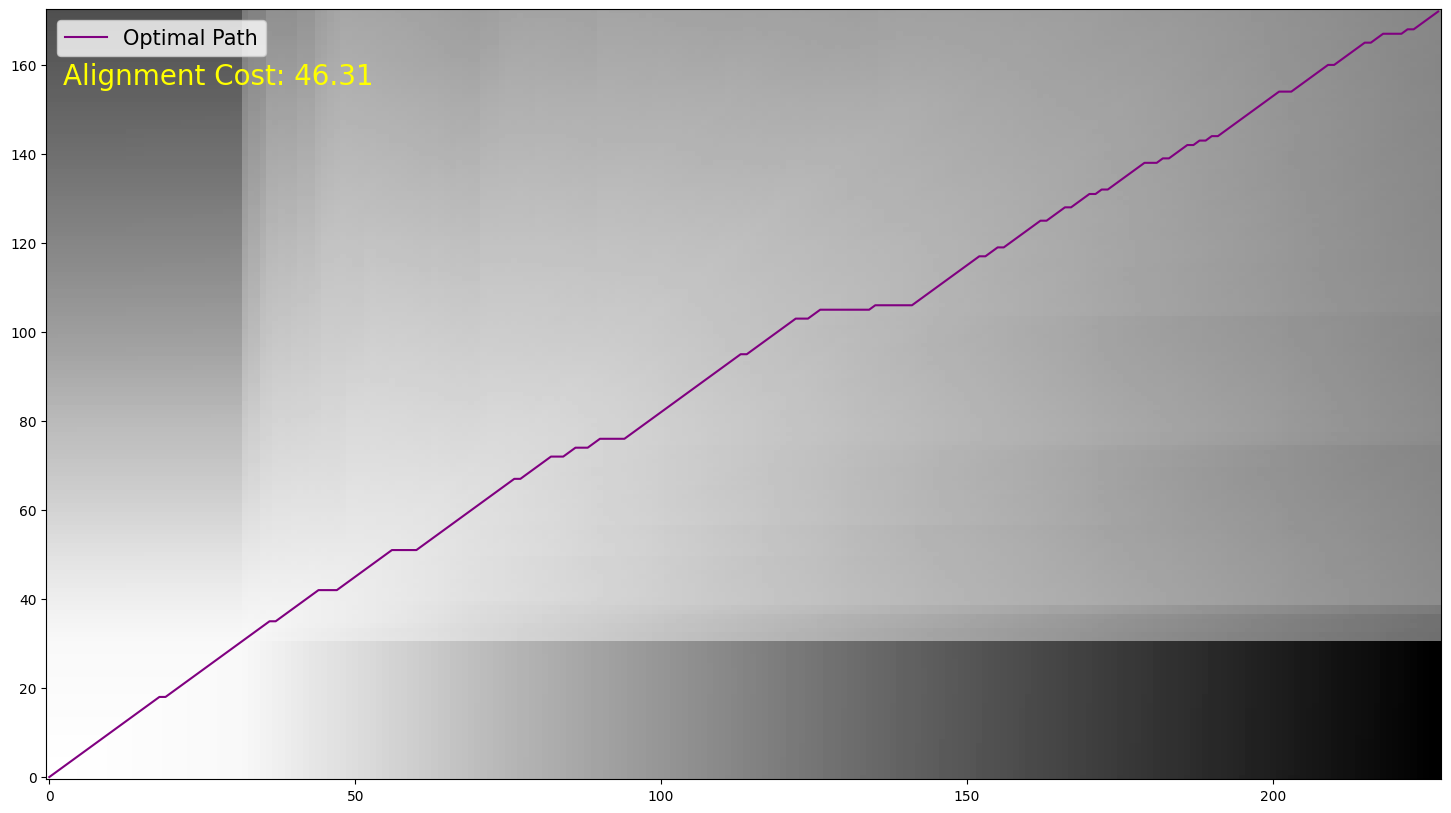

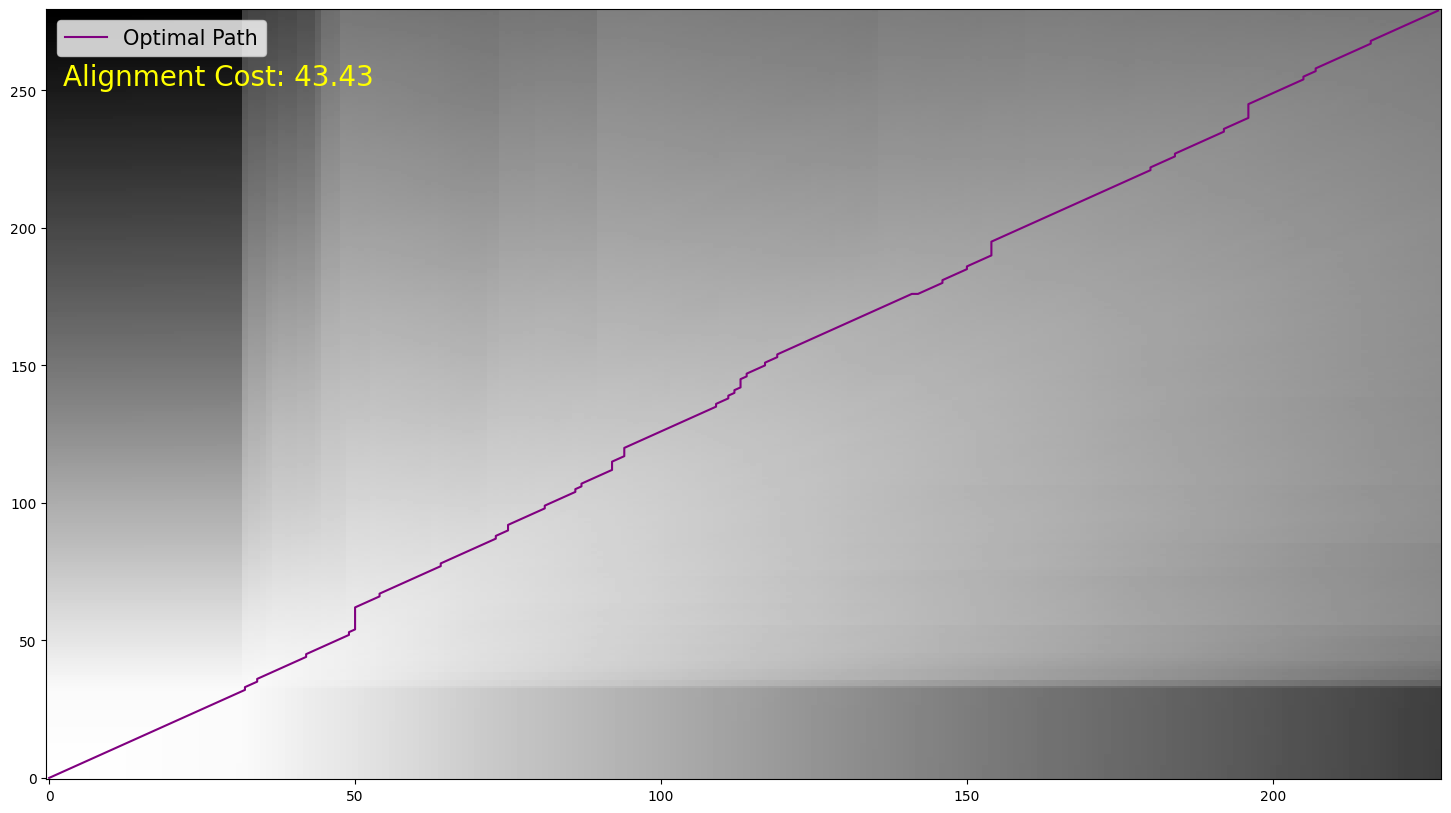

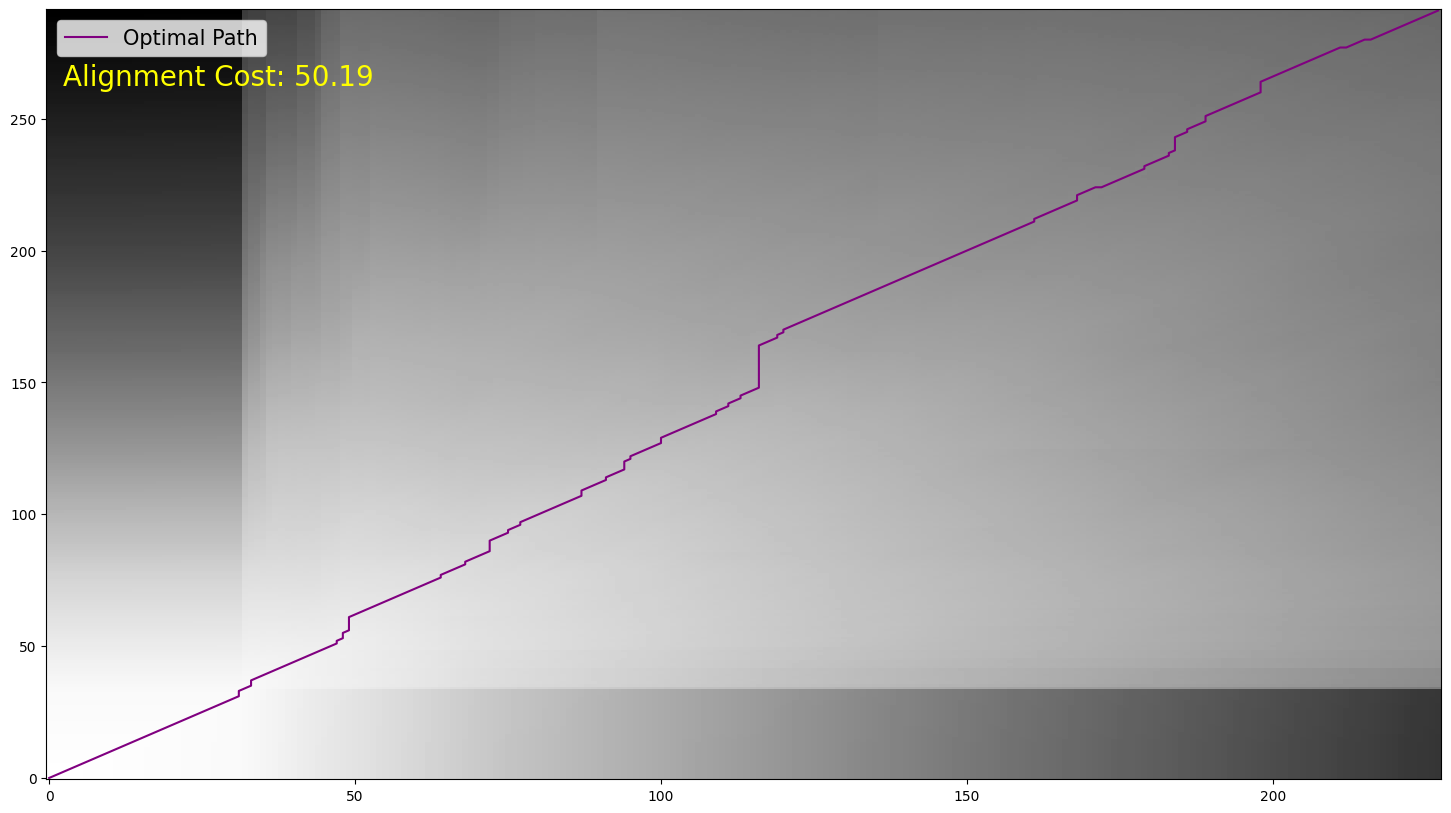

In [ ]:
# Mapping of the same digits: ####### DIGIT: 5 ######
for i in range(len(my_five_test)-1):
    matrix, dist, path = VectorDTW(my_five_test[i+1], my_five_test[0])
    # Plot the DTW path
    plt.figure(figsize=(18,10))
    plt.imshow(matrix, origin='lower', cmap='binary', aspect='auto', interpolation='nearest')
    plt.plot([x[1] for x in path], [x[0] for x in path], color='purple',label='Optimal Path')

    # Calculate the position of the text dynamically
    alignment_cost_text = f"Alignment Cost: {np.round(dist,2)}"
    text_x = 0.01 * matrix.shape[1]  # 5% from the left
    text_y = 0.9 * matrix.shape[0]   # 90% from the bottom
    plt.text(text_x, text_y, alignment_cost_text, c='yellow', fontsize=20)

    plt.legend(loc='upper left',fontsize=15)
    plt.show()


**DIFFERENT DIGIT CASE**

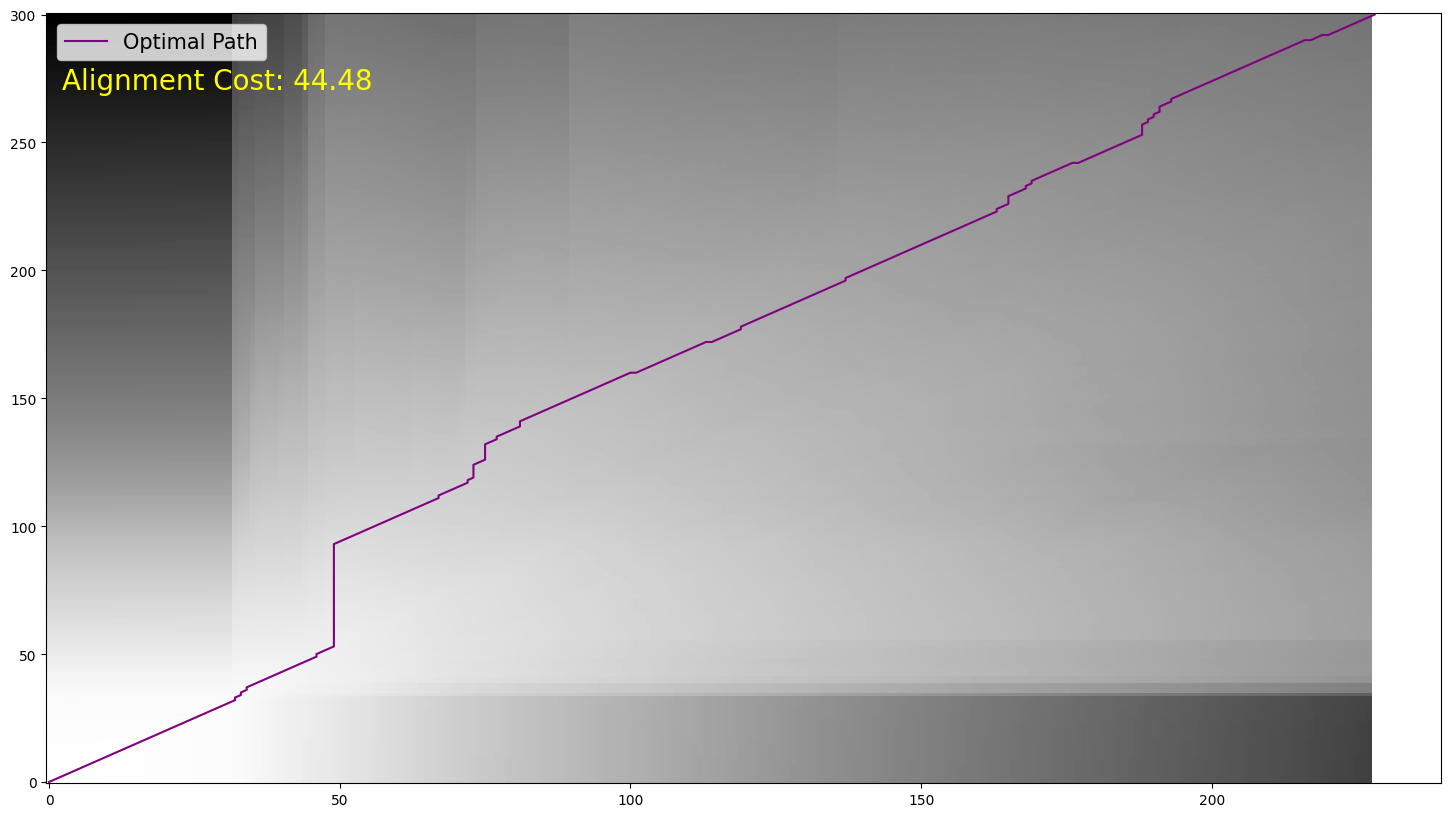

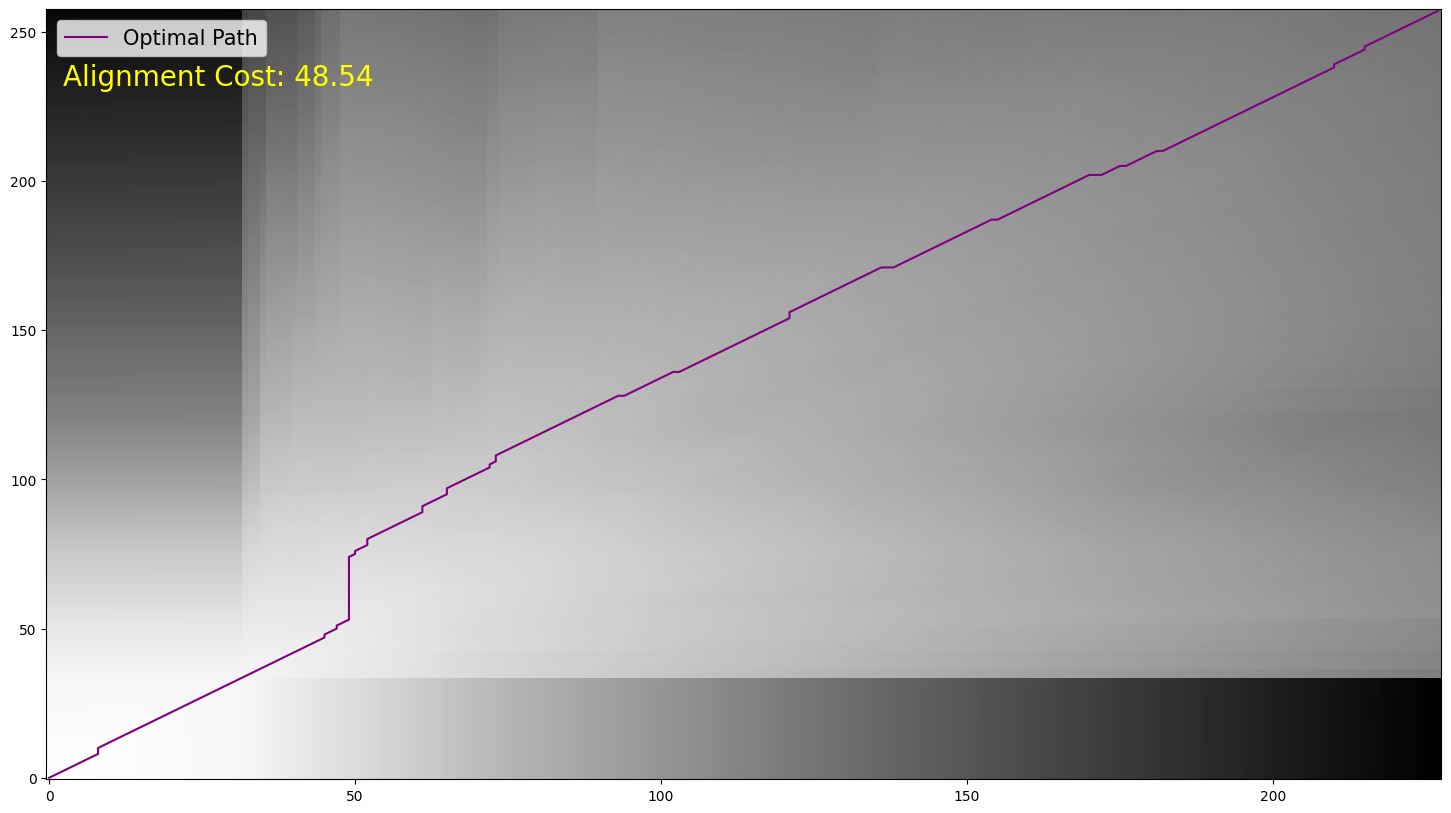

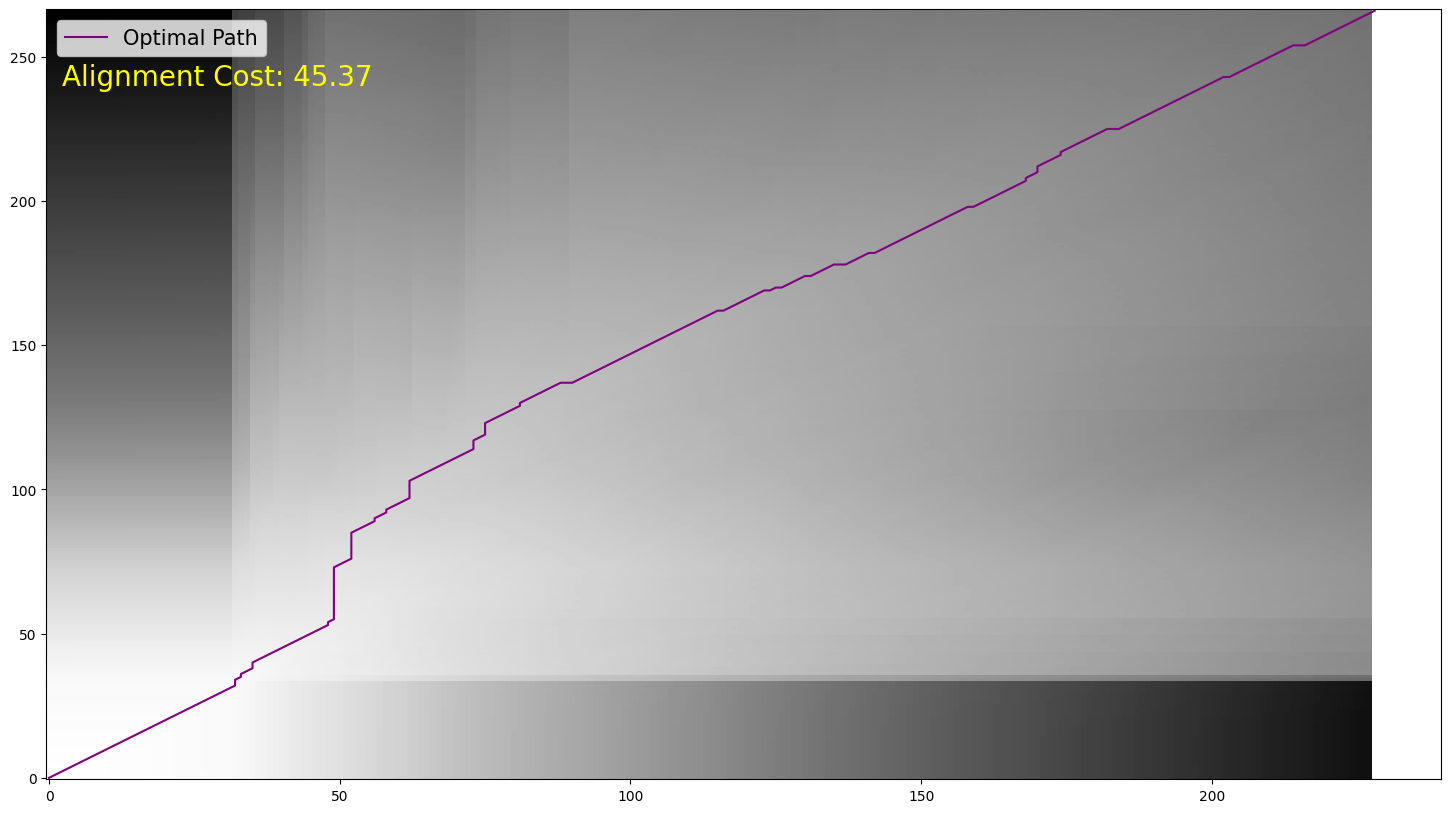

In [ ]:
# Mapping of the different digits: ####### REFRENCE DIGIT: 5  TEST DIGIT: 8 ######
for i in range(len(my_zero_test)-1):
    matrix, dist, path = VectorDTW(my_zero_test[i+1], my_five_test[0])
    # Plot the DTW path
    plt.figure(figsize=(18,10))
    plt.imshow(matrix, origin='lower', cmap='binary', aspect='auto', interpolation='nearest')
    plt.plot([x[1] for x in path], [x[0] for x in path], color='purple',label='Optimal Path')

    # Calculate the position of the text dynamically
    alignment_cost_text = f"Alignment Cost: {np.round(dist,2)}"
    text_x = 0.01 * matrix.shape[1]  # 5% from the left
    text_y = 0.9 * matrix.shape[0]   # 90% from the bottom
    plt.text(text_x, text_y, alignment_cost_text, c='yellow', fontsize=20)

    plt.legend(loc='upper left',fontsize=15)
    plt.show()


In [ ]:
def plot_confusion_matrix(confusion_matrix, title='Confusion matrix', accuracy=None):
    plt.figure(figsize=(18,10))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Reds)
    plt.title(title)
    plt.colorbar()
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, str(confusion_matrix[i, j]), horizontalalignment="center", color="black")
    if accuracy is not None:
        plt.text(0.1, -0.8, f'Accuracy: {np.round(accuracy*100,2)} %', horizontalalignment='right')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))
    plt.show()

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

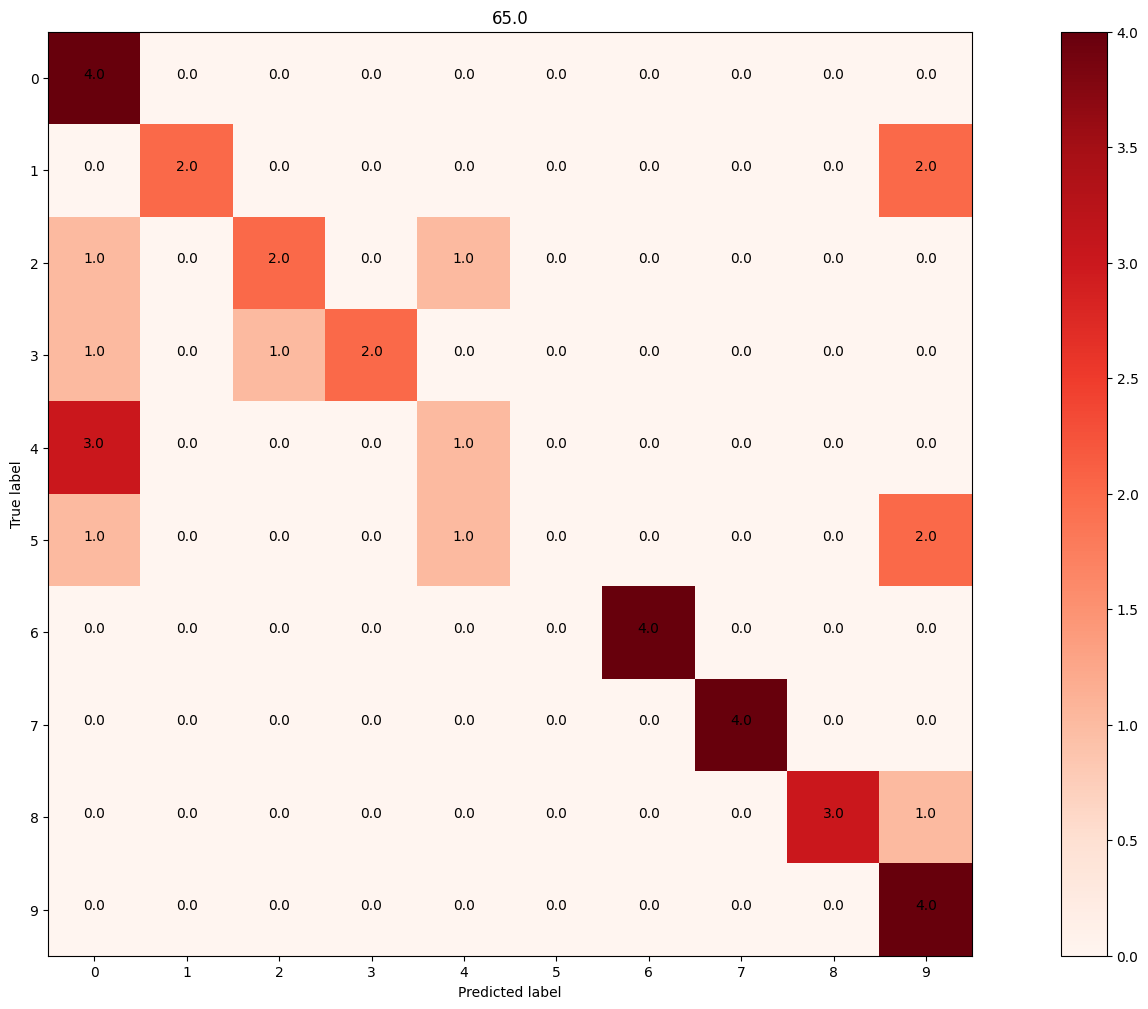

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

#refrence sequence
refrence = [my_zero_test[0], my_one_test[0], my_two_test[0], my_three_test[0], my_five_test[0],
       my_five_test[0], my_six_test[0], my_seven_test[0], my_eight_test[0], my_nine_test[0]]

# Initialize confusion matrix
cmatrix = np.zeros((10, 10))

# List of test sets for each digit
test_sets = [my_zero_test, my_one_test, my_two_test, my_three_test, my_four_test,
             my_five_test, my_six_test, my_seven_test, my_eight_test, my_nine_test]

def calculate_dtw(test_samples, refrence, digit_idx):
    for test_sample_idx, test_sample in enumerate(test_samples, start=0):
        dist = []
        for ref in refrence:
            # test_sample = (test_sample-np.mean(test_sample))/np.std(test_sample)
            # ref = (ref-np.mean(ref))/np.std(ref)
            matrix, distance, path = VectorDTW(test_sample, ref,'manhattan')
            dist.append(distance)
        recognized_digit = np.argmin(dist)
        cmatrix[digit_idx, recognized_digit] += 1

# Iterate over all digit classes
for digit_idx, test_set in enumerate(test_sets):
    calculate_dtw(test_set, refrence, digit_idx)

total_samples = np.sum(cmatrix)
correct_predictions = np.trace(cmatrix)
accuracy = correct_predictions / total_samples
# Display
plot_confusion_matrix(cmatrix,accuracy*100)

In [ ]:
total_samples = np.sum(cmatrix)
correct_predictions = np.trace(cmatrix)
accuracy = correct_predictions / total_samples
print(f'Accuracy is: {accuracy*100} %')

Accuracy is: 65.0 %


<b> Report your observations </b>

1. The accurcy in this case is very less i.e. 65.00 % using manhattan as the distance measure and a similar accuracy is obtained for euclidean distance measure as well .

2. There are several reasons for it, firstly the I have used the direct mfcc's of the audio sequences and the audio recoreded has much noise in it as well leading to the large misclassifications.

2. In this the test and reference audio from the same speaker, we would expect the model to have a high accuracy. This seems to be the case here given the high number of correct predictions (dark squares along the diagonal). However, without the exact numbers, this is just a qualitative observation.

3. From the best of my knowledege we could apply some transformation on the sequence (to denoise the audio signal) in order to get a better accuracy.



##Part-3


<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [5]:
from google.colab import drive
import os
!pip -q install pydub
from pydub import AudioSegment
from IPython.display import Audio, display
import time
import librosa
import numpy as np
import scipy.io.wavfile as wav


def extract_mfcc(audio_path, n_mfcc=13):
    # Load audio file
    (rate, sig) = wav.read(audio_path)

    # Preprocess the signal
    sig = sig - np.mean(sig)

    # Extract MFCC features
    mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)

    # Apply cepstral mean and variance normalization (CMVN)
    mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)

    return mfcc_feat_cmvn

# Load the dataset
drive.mount('/content/drive', force_remount=True)
mypath = "/content/drive/MyDrive/PRML_Assignments/Assignment_5/Elongated-pronouciations"

digits_features = {}
# Iterate over the digits and speakers
digits = ['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
speakers = ['jackson', 'nicolas', 'theo', 'yweweler']
for j, digit in enumerate(digits, start=0):
    digit_features = {}
    for speaker in speakers:
        speaker_features = []
        for i in range(1, 20):
            # Load the WAV file
            audio = AudioSegment.from_file(os.path.join(mypath, f"{digit}/{j}_{speaker}_{i}.wav"), format="wav")

            # Path to the WAV file
            wav_path = os.path.join(mypath, f"{digit}/{j}_{speaker}_{i}.wav")
            speaker_features.append(extract_mfcc(wav_path))
        digit_features[speaker] = speaker_features
    digits_features[digit] = digit_features

Mounted at /content/drive


In [6]:
def normalize_sequence(seq):
  return (seq-np.mean(seq))/np.std(seq)

def plot_confusion_matrix(confusion_matrix, title='Confusion matrix', accuracy=None):
    plt.figure(figsize=(18,10))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Reds)
    plt.title(title)
    plt.colorbar()
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, str(confusion_matrix[i, j]), horizontalalignment="center", color="black")
    if accuracy is not None:
        plt.text(0.1, -0.8, f'Accuracy: {np.round(accuracy*100,2)} %', horizontalalignment='right')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))
    plt.show()

def calculate_accuracy(ndigit, nspeak, digits_features, mfcc_refrence, measure='euclidean'):
    confusion_matrix = np.zeros((len(ndigit), len(ndigit)))
    for d_idx, d in enumerate(ndigit, start=0):
        for s_idx, s in enumerate(nspeak, start=0):
            y = digits_features[d][s]
            for i in (y):
                dtw_distances = []
                for ref in mfcc_refrence:
                    i = normalize_sequence(i)
                    ref = normalize_sequence(ref)
                    _, dist, _ = VectorDTW(i, ref, measure)
                    dtw_distances.append(dist)
                recognized_digit = np.argmin(dtw_distances)
                confusion_matrix[d_idx, recognized_digit] += 1

    # Calculate accuracy
    total_samples = np.sum(confusion_matrix)
    correct_predictions = np.trace(confusion_matrix)
    accuracy = correct_predictions / total_samples

    plot_confusion_matrix(confusion_matrix, 'Confusion matrix with ' + nspeak[0], accuracy)

In [9]:
from google.colab import drive
import os
from pydub import AudioSegment
from IPython.display import Audio, display
import time
import librosa
import numpy as np


def extract_mfcc(audio_path, n_mfcc=13):
    # Load audio file
    (rate, sig) = wav.read(audio_path)

    # Preprocess the signal
    sig = sig - np.mean(sig)

    # Extract MFCC features
    mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)

    # Apply cepstral mean and variance normalization (CMVN)
    mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)

    return mfcc_feat_cmvn

# Load the dataset
drive.mount('/content/drive', force_remount=True)
mypath = "/content/drive/MyDrive/PRML_Assignments/Assignment_5/Elongated-pronouciations"

# Initialize dictionaries for each speaker REFRENCE SEQUENCES
jackson_features = []
nicolas_features = []
theo_features = []
yweweler_features = []

# Iterate over the digits
digits = ['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
for j, digit in enumerate(digits, start=0):
    speaker_features = []
    # for i in range(1, 11):
    # Path to the WAV file
    wav_path = os.path.join(mypath, f"{digit}/{j}_jackson_{1}.wav")
    jackson_features.append(extract_mfcc(wav_path))

for j, digit in enumerate(digits, start=0):
    speaker_features = []
    # for i in range(1, 11):
    # Path to the WAV file
    wav_path = os.path.join(mypath, f"{digit}/{j}_nicolas_{1}.wav")
    nicolas_features.append(extract_mfcc(wav_path))

for j, digit in enumerate(digits, start=0):
    speaker_features = []
    # for i in range(1, 11):
    # Path to the WAV file
    wav_path = os.path.join(mypath, f"{digit}/{j}_theo_{1}.wav")
    theo_features.append(extract_mfcc(wav_path))

for j, digit in enumerate(digits, start=0):
    speaker_features = []
    # for i in range(1, 11):
    # Path to the WAV file
    wav_path = os.path.join(mypath, f"{digit}/{j}_yweweler_{1}.wav")
    yweweler_features.append(extract_mfcc(wav_path))


# Initialize dictionaries for each speaker TEST SEQUENCES
jackson_features_test = {}
nicolas_features_test = {}
theo_features_test = {}
yweweler_features_test = {}

# Iterate over the digits
digits = ['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
speakers = ['jackson', 'nicolas', 'theo', 'yweweler']
for j, digit in enumerate(digits, start=0):
    for speaker in speakers:
        speaker_features = []
        for i in range(5, 15):
            # Path to the WAV file
            wav_path = os.path.join(mypath, f"{digit}/{j}_{speaker}_{i}.wav")
            speaker_features.append(extract_mfcc(wav_path))

        # Assign the speaker features to the corresponding speaker's dictionary
        if speaker == 'jackson':
            jackson_features_test[digit] = speaker_features
        elif speaker == 'nicolas':
            nicolas_features_test[digit] = speaker_features
        elif speaker == 'theo':
            theo_features_test[digit] = speaker_features
        elif speaker == 'yweweler':
            yweweler_features_test[digit] = speaker_features

Mounted at /content/drive


<b> Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference signal as the TDIGIT  and test signal coming from the audio we recoreded earlier</b>

In [11]:
yweweler_features_test['ones'][0].shape

# Initialize confusion matrix
cmatrix = np.zeros((10, 10))
def calculate_dtw(test_samples, refrence, digit_idx):
    for test_sample_idx, test_sample in enumerate(test_samples, start=0):
        dist = []
        for ref in refrence:
            # test_sample = (test_sample-np.mean(test_sample))/np.std(test_sample)
            # ref = (ref-np.mean(ref))/np.std(ref)
            matrix, distance, path = VectorDTW(test_sample, ref,'manhattan')
            dist.append(distance)
        recognized_digit = np.argmin(dist)
        cmatrix[digit_idx, recognized_digit] += 1

(32, 13)

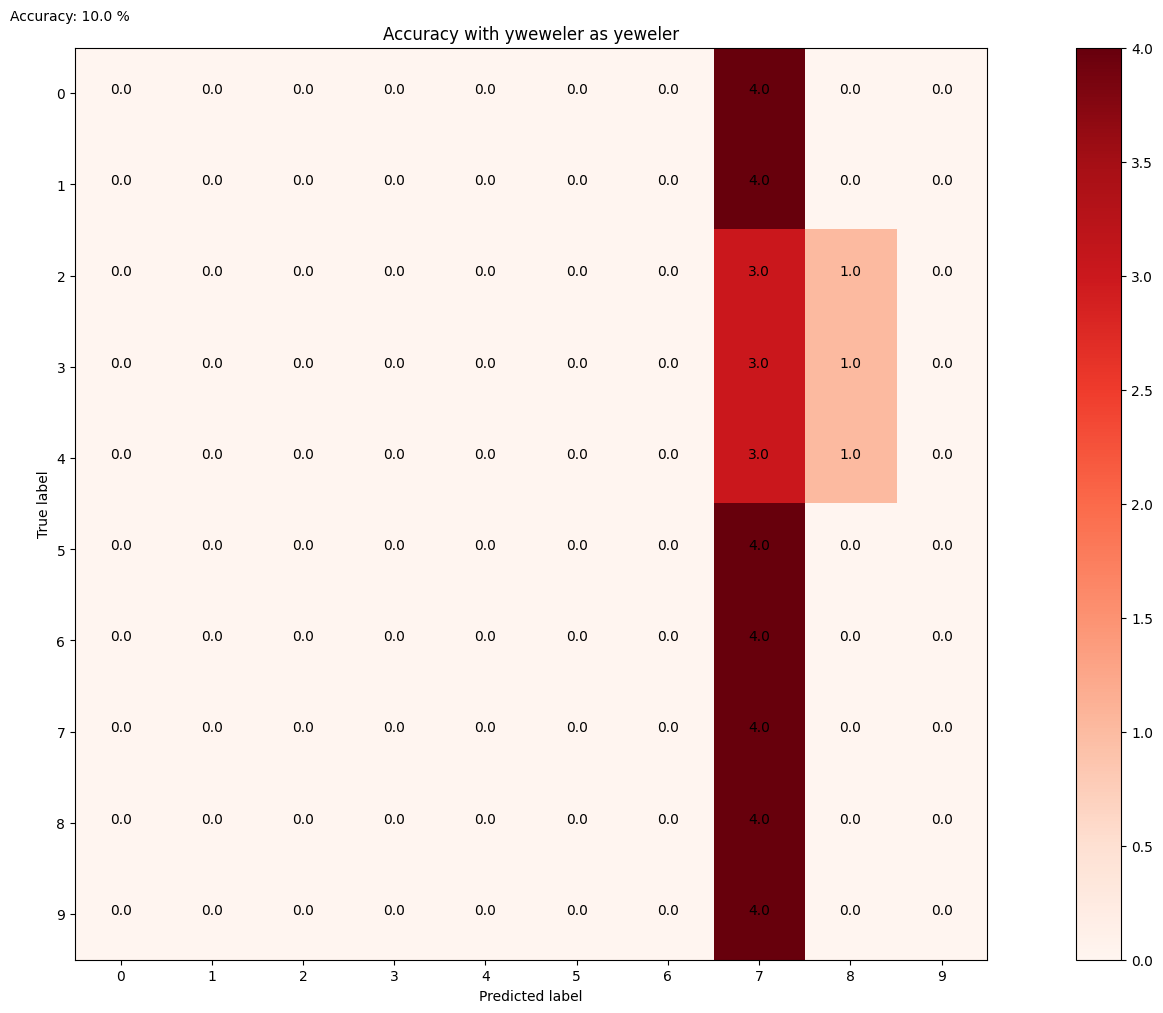

In [35]:
test_sets = [my_zero_test, my_one_test, my_two_test, my_three_test, my_four_test,
             my_five_test, my_six_test, my_seven_test, my_eight_test, my_nine_test]
refrence_yweweler = [yweweler_features_test['zeros'][0], yweweler_features_test['ones'][0], yweweler_features_test['two'][0], yweweler_features_test['three'][0], yweweler_features_test['four'][0],
            yweweler_features_test['five'][0], yweweler_features_test['six'][0], yweweler_features_test['seven'][0], yweweler_features_test['eight'][0],yweweler_features_test['nine'][0]]

cmatrix4 = np.zeros((10, 10))
def calculate_dtw(test_samples, refrence, digit_idx):
    for test_sample_idx, test_sample in enumerate(test_samples, start=0):
        dist = []
        for ref in refrence:
            test_sample = (test_sample-np.mean(test_sample))/np.std(test_sample)
            ref = (ref-np.mean(ref))/np.std(ref)
            matrix, distance, path = VectorDTW(test_sample, ref,'euclidean')
            dist.append(distance)
        recognized_digit = np.argmin(dist)
        cmatrix4[digit_idx, recognized_digit] += 1

for digit_idx, test_set in enumerate(test_sets):
    calculate_dtw(test_set, refrence_yweweler, digit_idx)


total_samples = np.sum(cmatrix4)
correct_predictions = np.trace(cmatrix4)
accuracy = correct_predictions / total_samples
# Display
plot_confusion_matrix(cmatrix4, title='Accuracy with yweweler as yeweler', accuracy =accuracy)

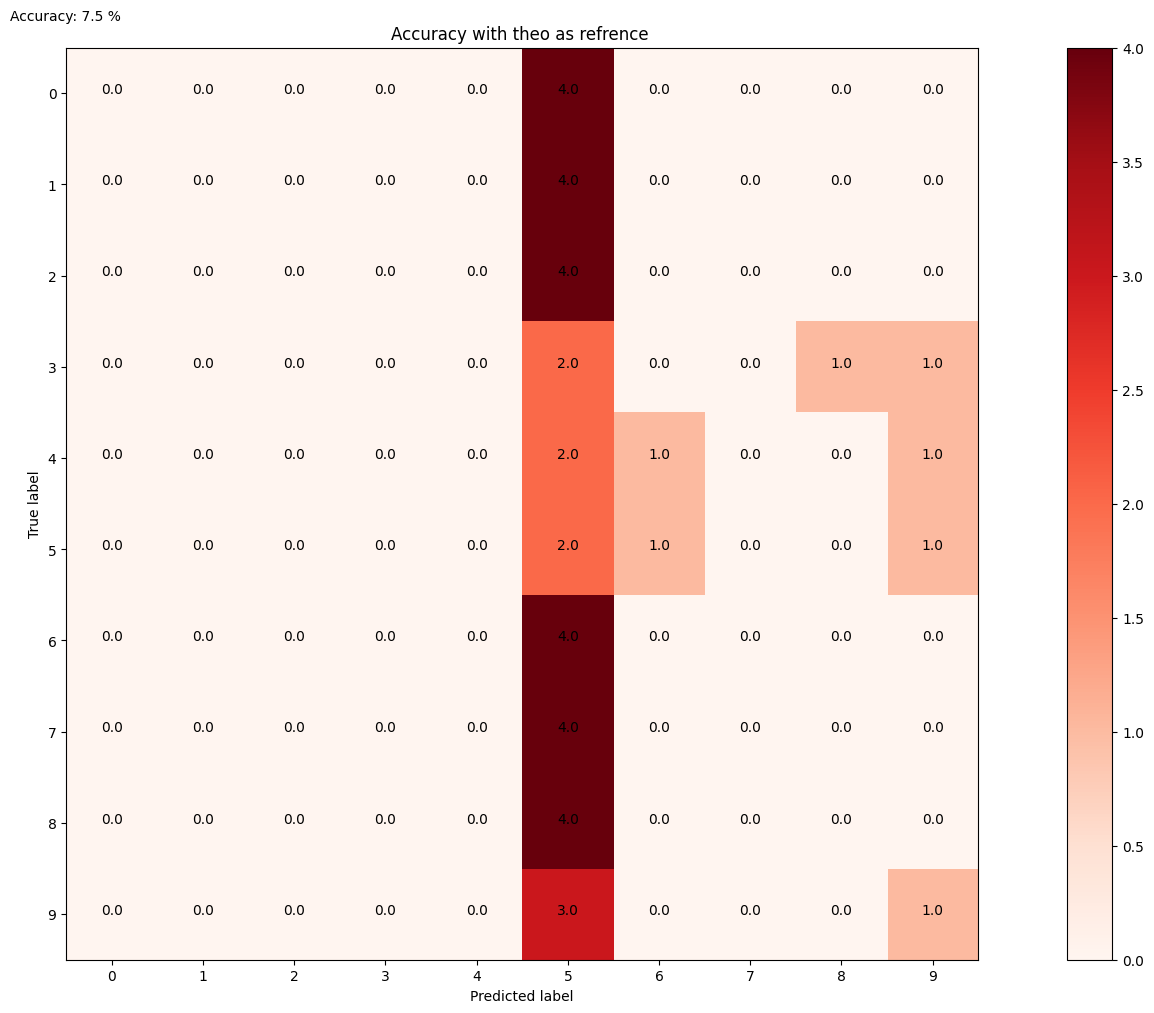

In [31]:
test_sets = [my_zero_test, my_one_test, my_two_test, my_three_test, my_four_test,
             my_five_test, my_six_test, my_seven_test, my_eight_test, my_nine_test]
refrence_theo = [theo_features_test['zeros'][0], theo_features_test['ones'][0], theo_features_test['two'][0], theo_features_test['three'][0], theo_features_test['four'][0],
            theo_features_test['five'][0], theo_features_test['six'][0], theo_features_test['seven'][0], theo_features_test['eight'][0],theo_features_test['nine'][0]]

cmatrix_refrence_theo = np.zeros((10, 10))
def calculate_dtw(test_samples, refrence, digit_idx):
    for test_sample_idx, test_sample in enumerate(test_samples, start=0):
        dist = []
        for ref in refrence:
            test_sample = (test_sample-np.mean(test_sample))/np.std(test_sample)
            ref = (ref-np.mean(ref))/np.std(ref)
            matrix, distance, path = VectorDTW(test_sample, ref,'euclidean')
            dist.append(distance)
        recognized_digit = np.argmin(dist)
        cmatrix_refrence_theo[digit_idx, recognized_digit] += 1

for digit_idx, test_set in enumerate(test_sets):
    calculate_dtw(test_set, refrence_theo, digit_idx)


total_samples = np.sum(cmatrix_refrence_theo)
correct_predictions = np.trace(cmatrix_refrence_theo)
accuracy = correct_predictions / total_samples
# Display
plot_confusion_matrix(cmatrix_refrence_theo, title='Accuracy with theo as refrence ', accuracy=accuracy)

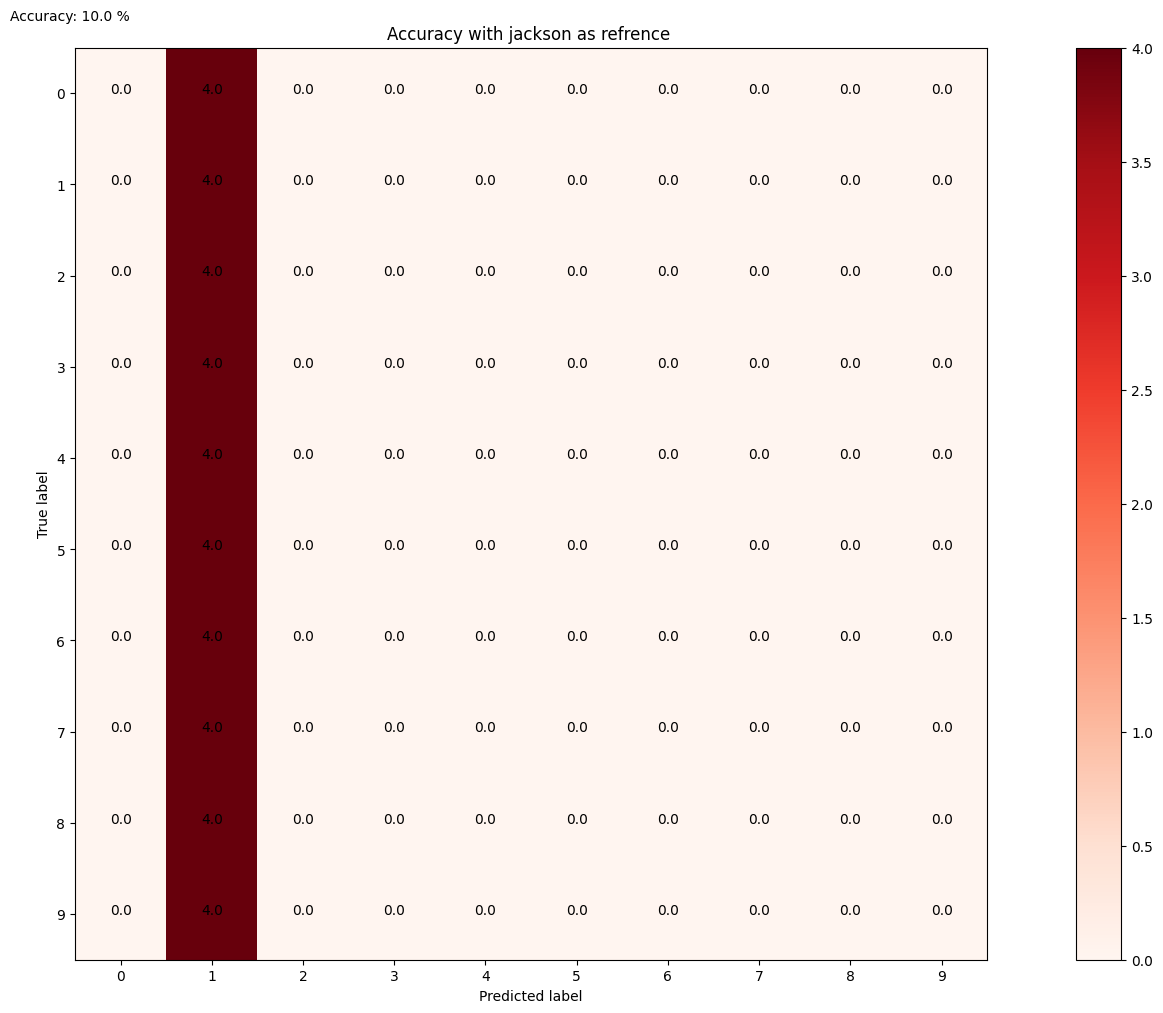

In [32]:
test_sets = [my_zero_test, my_one_test, my_two_test, my_three_test, my_four_test,
             my_five_test, my_six_test, my_seven_test, my_eight_test, my_nine_test]
refrence_jackson = [jackson_features_test['zeros'][0], jackson_features_test['ones'][0], jackson_features_test['two'][0], jackson_features_test['three'][0], jackson_features_test['four'][0],
            jackson_features_test['five'][0], jackson_features_test['six'][0], jackson_features_test['seven'][0], jackson_features_test['eight'][0],jackson_features_test['nine'][0]]

cmatrix4_jackson = np.zeros((10, 10))
def calculate_dtw(test_samples, refrence, digit_idx):
    for test_sample_idx, test_sample in enumerate(test_samples, start=0):
        dist = []
        for ref in refrence:
            test_sample = (test_sample-np.mean(test_sample))/np.std(test_sample)
            ref = (ref-np.mean(ref))/np.std(ref)
            matrix, distance, path = VectorDTW(test_sample, ref,'euclidean')
            dist.append(distance)
        recognized_digit = np.argmin(dist)
        cmatrix4_jackson[digit_idx, recognized_digit] += 1

for digit_idx, test_set in enumerate(test_sets):
    calculate_dtw(test_set, refrence_jackson, digit_idx)


total_samples = np.sum(cmatrix4_jackson)
correct_predictions = np.trace(cmatrix4_jackson)
accuracy = correct_predictions / total_samples
# Display
plot_confusion_matrix(cmatrix4_jackson, title='Accuracy with jackson as refrence ', accuracy=accuracy)

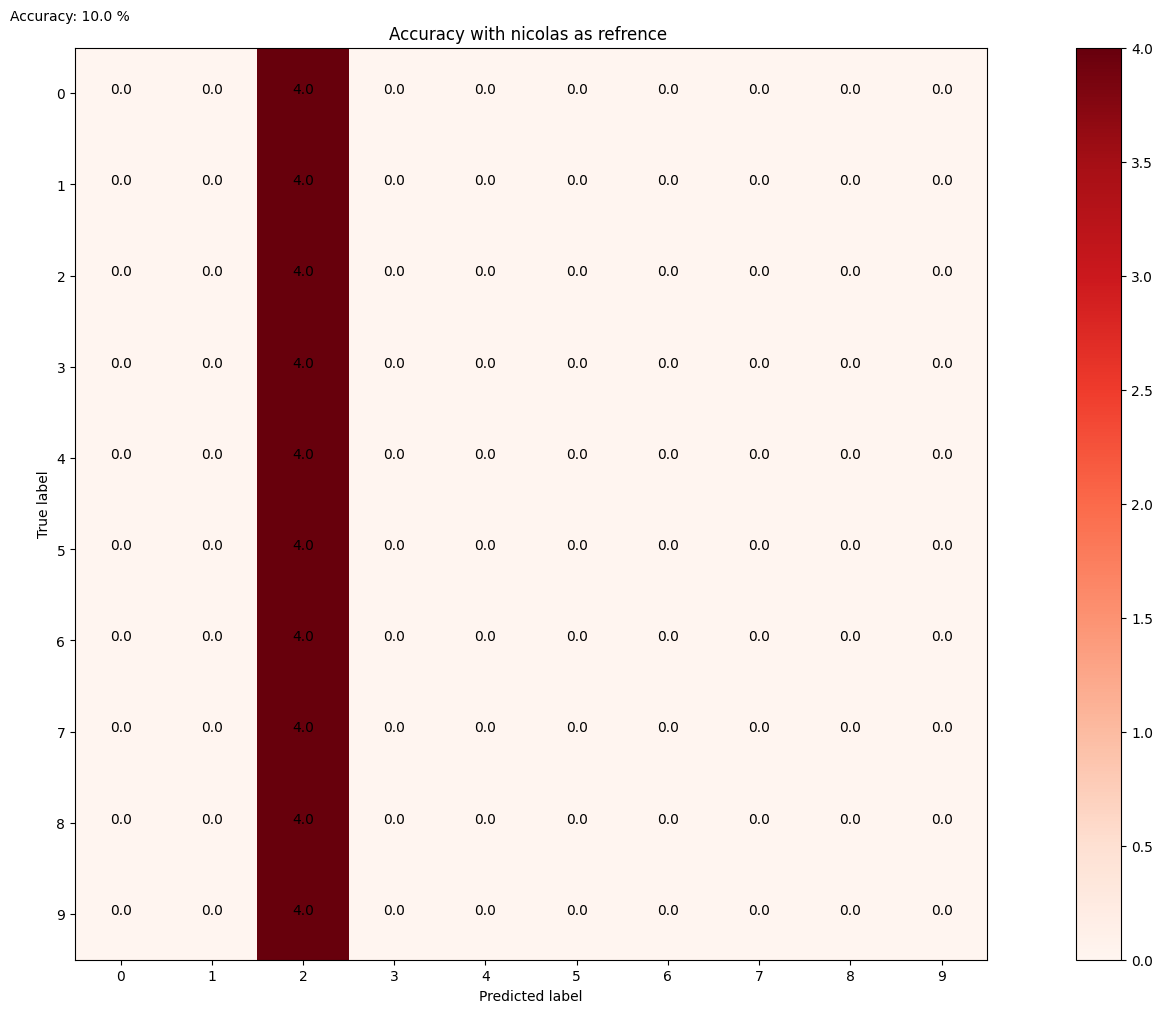

In [33]:
test_sets = [my_zero_test, my_one_test, my_two_test, my_three_test, my_four_test,
             my_five_test, my_six_test, my_seven_test, my_eight_test, my_nine_test]
refrence_nicloas = [nicolas_features_test['zeros'][0], nicolas_features_test['ones'][0], nicolas_features_test['two'][0], nicolas_features_test['three'][0], nicolas_features_test['four'][0],
            nicolas_features_test['five'][0], nicolas_features_test['six'][0], nicolas_features_test['seven'][0], nicolas_features_test['eight'][0],nicolas_features_test['nine'][0]]

cmatrix4_nicloas = np.zeros((10, 10))
def calculate_dtw(test_samples, refrence, digit_idx):
    for test_sample_idx, test_sample in enumerate(test_samples, start=0):
        dist = []
        for ref in refrence:
            # test_sample = (test_sample-np.mean(test_sample))/np.std(test_sample)
            # ref = (ref-np.mean(ref))/np.std(ref)
            matrix, distance, path = VectorDTW(test_sample, ref,'euclidean')
            dist.append(distance)
        recognized_digit = np.argmin(dist)
        cmatrix4_nicloas[digit_idx, recognized_digit] += 1

for digit_idx, test_set in enumerate(test_sets):
    calculate_dtw(test_set, refrence_nicloas, digit_idx)


total_samples = np.sum(cmatrix4_nicloas)
correct_predictions = np.trace(cmatrix4_nicloas)
accuracy = correct_predictions / total_samples
# Display
plot_confusion_matrix(cmatrix4_nicloas, title='Accuracy with nicolas as refrence ', accuracy=accuracy)

<b> Observations on classification based with the reference signal as the TDIGIT  and test signal coming from the audio we recoreded earlier</b>

 1. It can be clearly seen that DTW algorithm fails to classify when speakers are entirely different.

 2. Here, the refrence signal i.e. TDIGIT data has a foreign ascent, while the test recorded by us has indain ascent , which the DTW is incapable to capture.

 3. Hence we get very less accuracy of around 10 % overall in almost all 4 cases.

**Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker. Reference and test are both from TDIGIT only.**


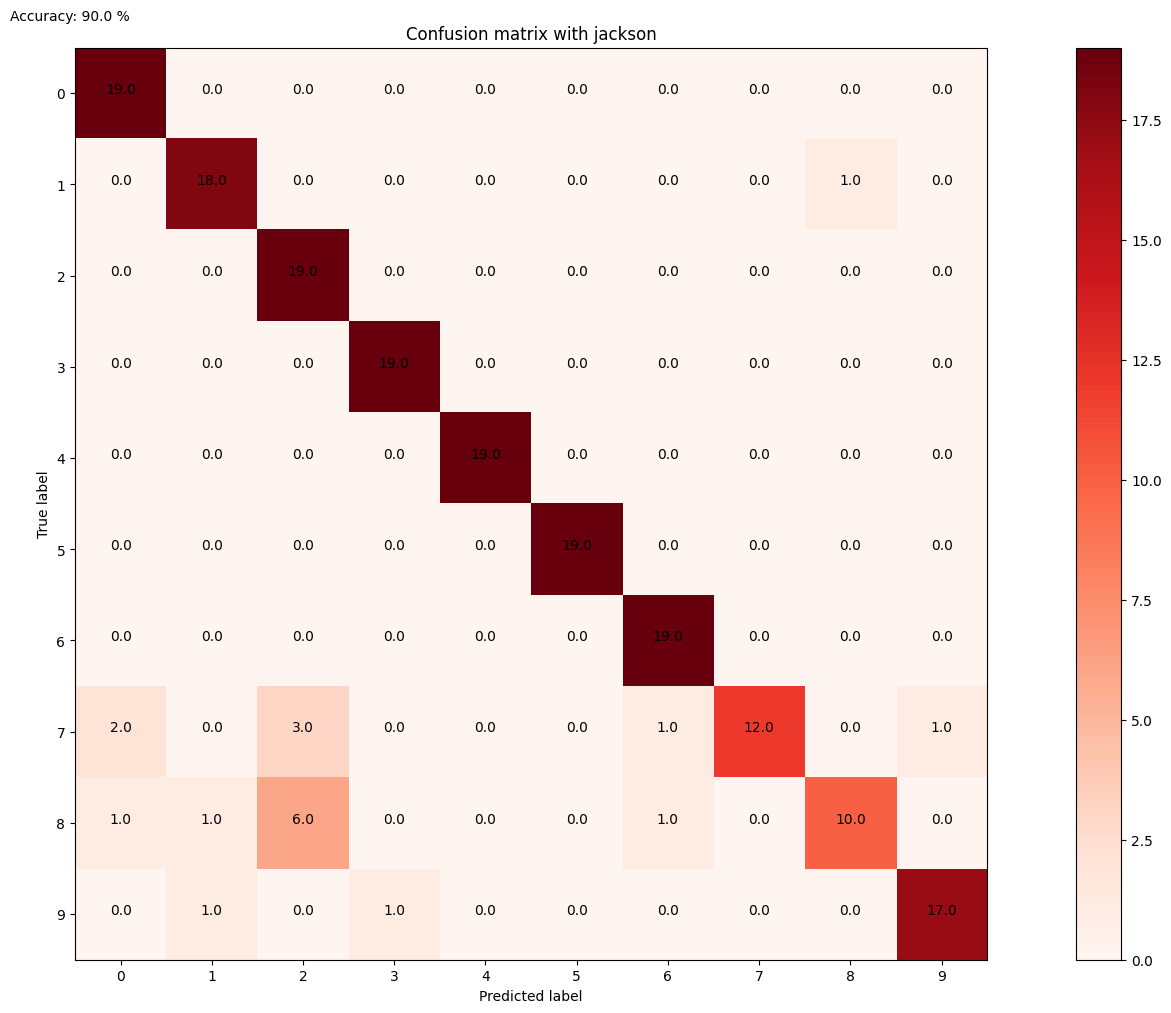

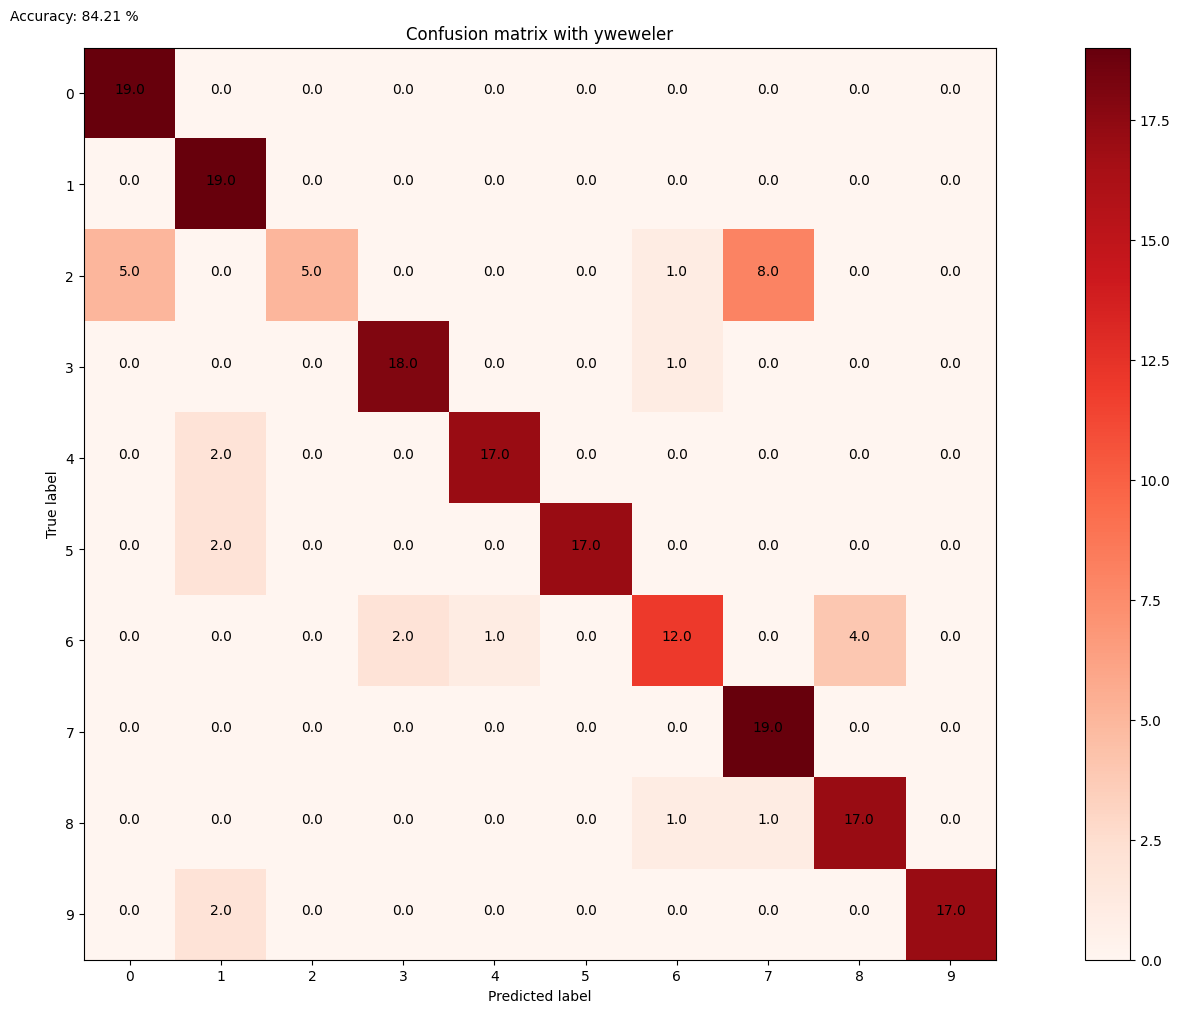

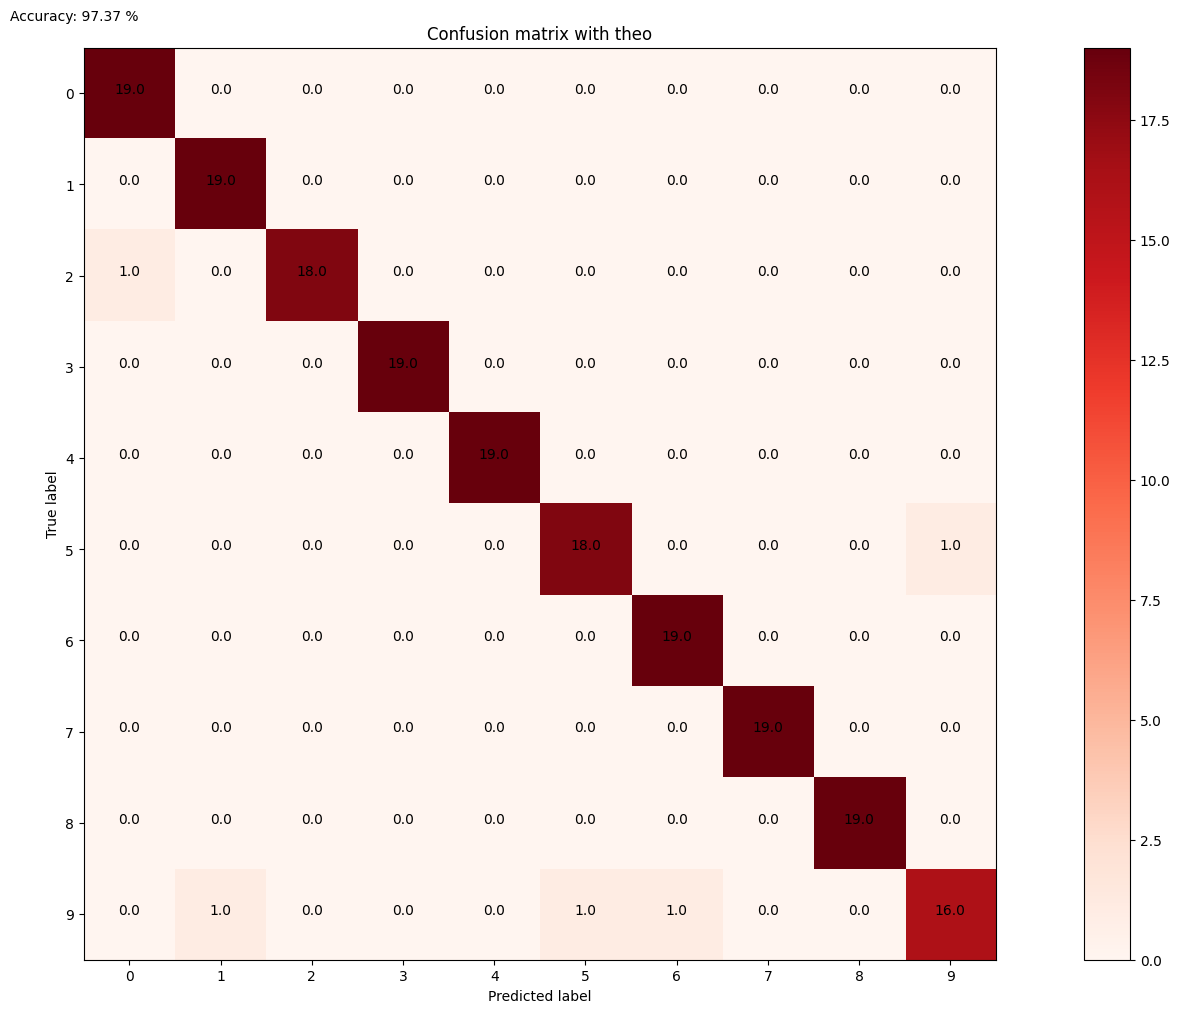

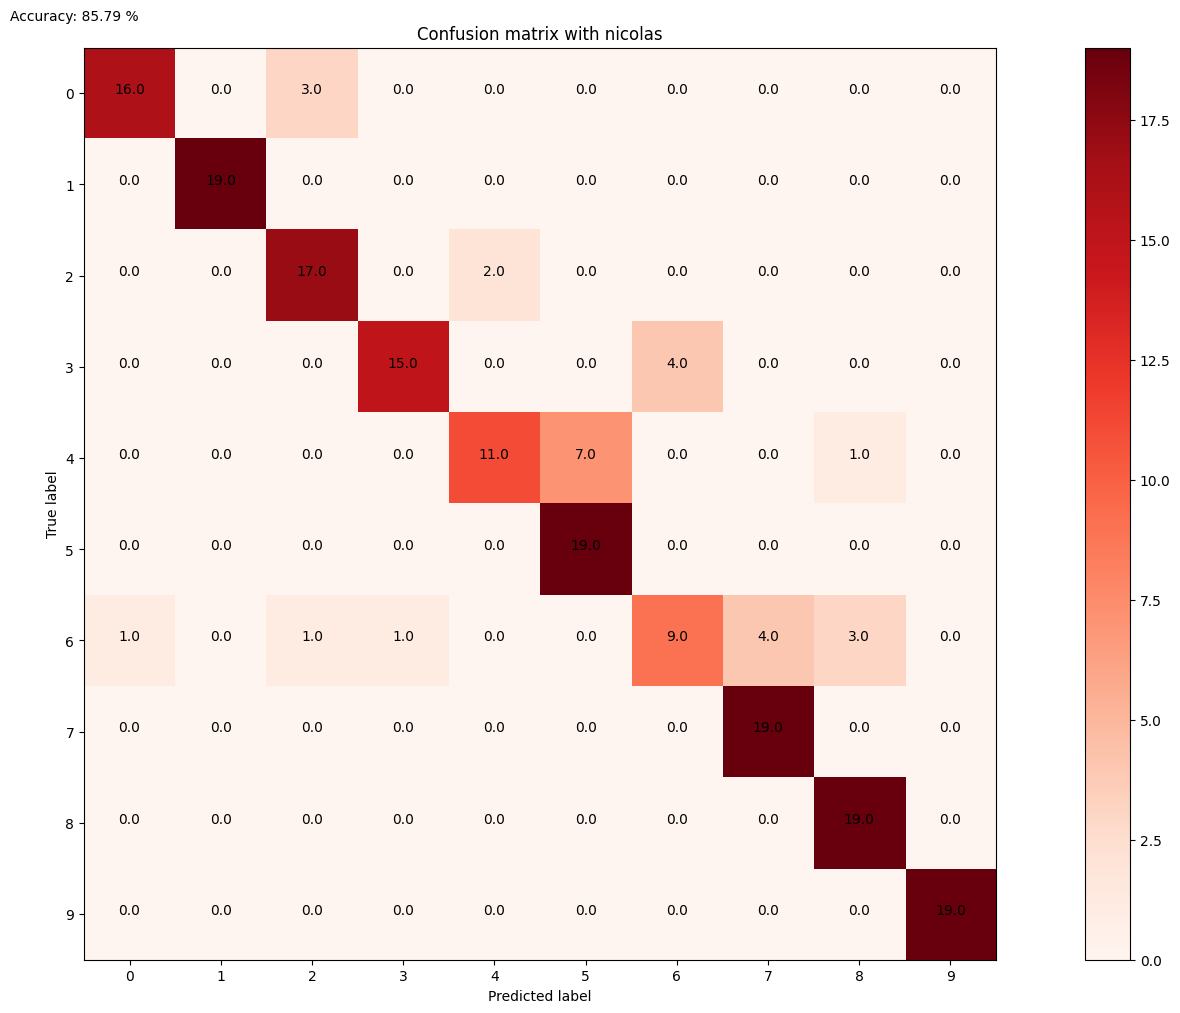

In [ ]:
ndigit=['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak=[ 'jackson']
calculate_accuracy(ndigit, nspeak, digits_features, jackson_features)


ndigit=['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak=[ 'yweweler']
calculate_accuracy(ndigit, nspeak, digits_features, yweweler_features)


ndigit = ['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak = ['theo']
calculate_accuracy(ndigit, nspeak, digits_features, theo_features)


ndigit=['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak=[ 'nicolas']
calculate_accuracy(ndigit, nspeak, digits_features, nicolas_features)

<b> Observations based on same digits classifications </b>

1. From the three speakers confusion matrix it is clearly visible that with theo as the speaker we get the maximum accuracy of 97+ %.

2. In  case of theo as the speaker the most confused digit is 9.

3. In case of Jackson as the speaker the most confused digits are 8 and 9.

4. In case of yweweler as the speaker the most confused digts are 2 and 6.

5. In case of nicolas as the speaker the most confused digits are 4 an 6.

6. The case of yweweler has the minimum accuracy the possible reason for that could be the overall clarity and consistency of speech, the speed of speech, the accent, the pronunciation of consonants, and the quality of the audio recording can all affect the performance of the algorithm.

7. Also better sparation of vowels sounds also plays a role in it.

8. I have used normaalization of the mfcc features to get better results.

**Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers. Reference and test are both from TDIGIT only.**


(1) WITH REFRENCE SPEAKER AS JACKSON

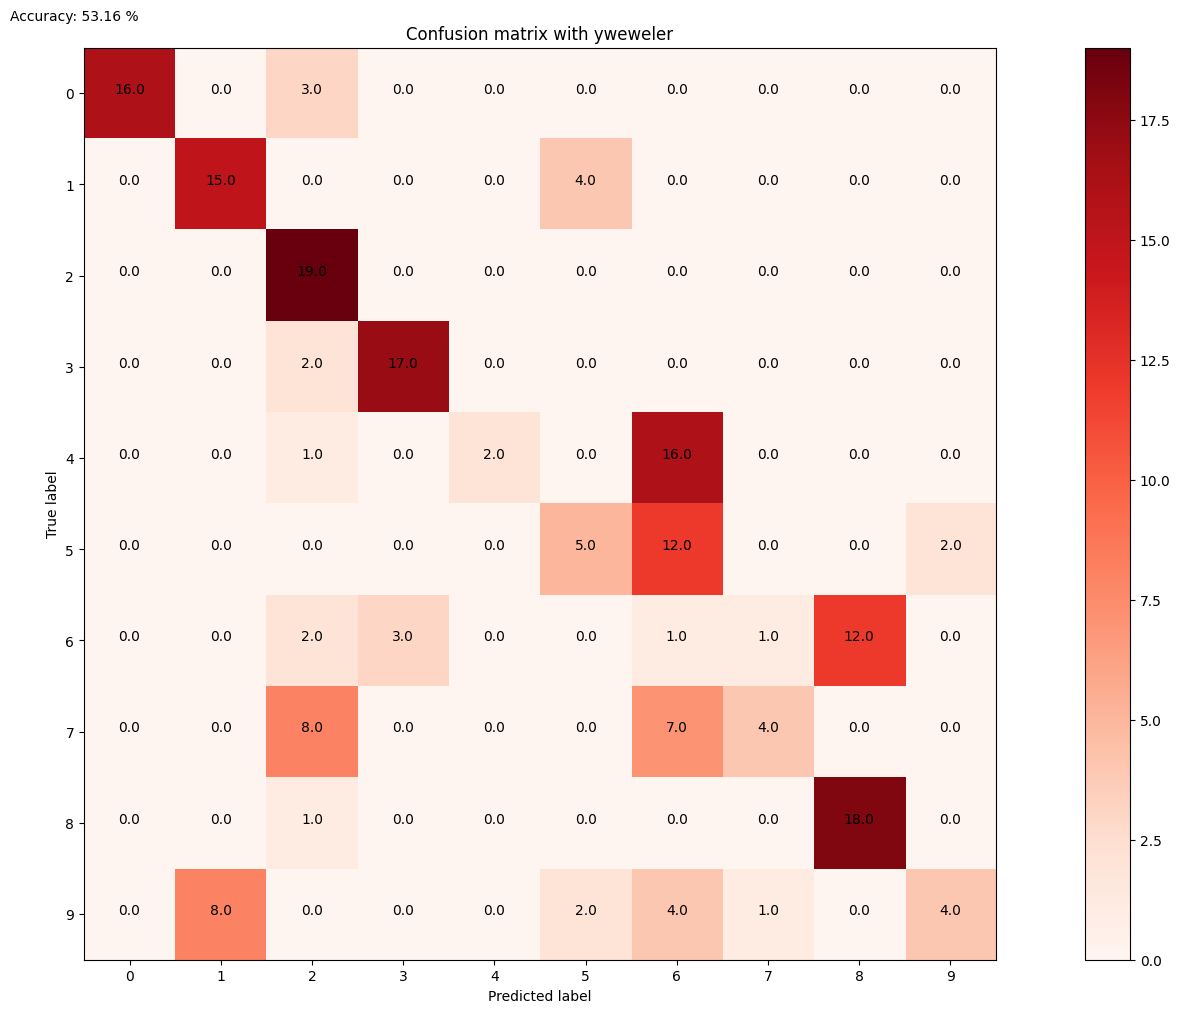

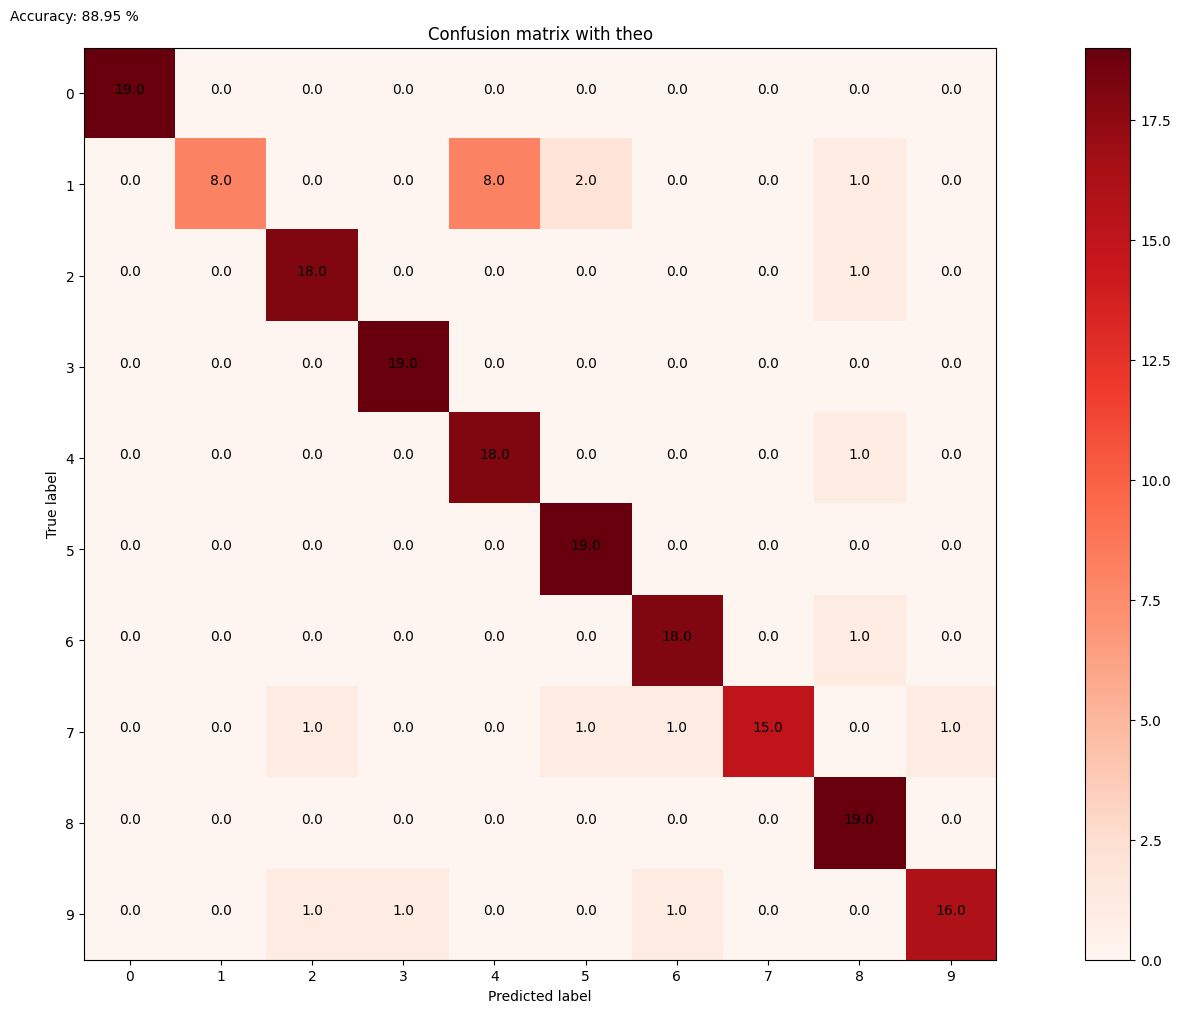

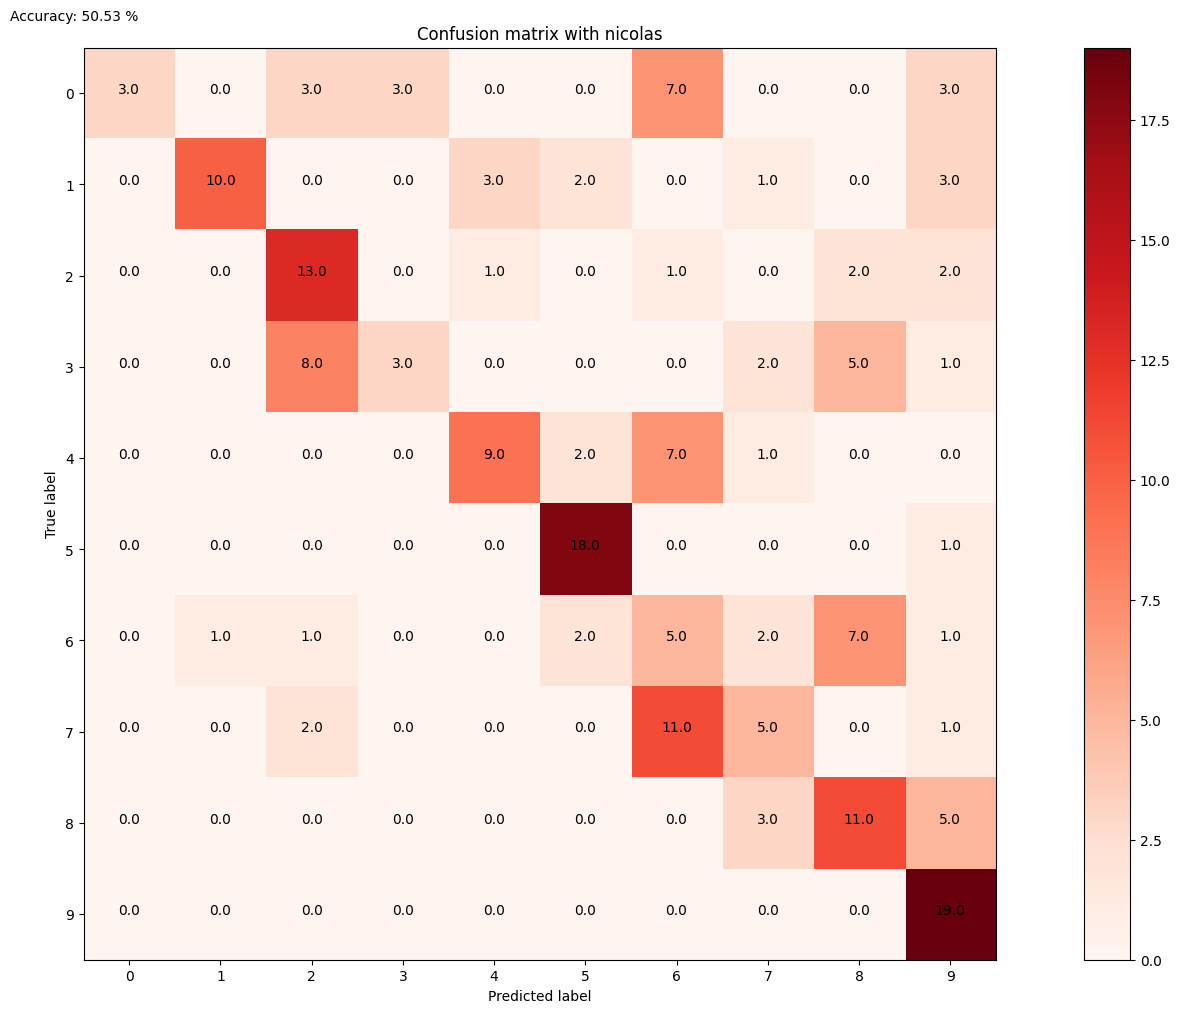

In [ ]:
ndigit=['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak=[ 'yweweler']
calculate_accuracy(ndigit, nspeak, digits_features, jackson_features)


ndigit = ['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak = ['theo']
calculate_accuracy(ndigit, nspeak, digits_features, jackson_features)


ndigit=['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak=[ 'nicolas']
calculate_accuracy(ndigit, nspeak, digits_features, jackson_features)

<b> Observations with Jackson as the speakers for reference</b>

1. With Jackson as a speaker as refrence we get the maximum accuracy for test sequences of remaining speakers.That is best results are obtained with Jackson as the refrence speaker.

2. **Most Confused Digits**:I general the most confused digit is 1 and is being confused as 4 or 5.

2. **Most Versatile Speaker**: The speaker whose predictions align most closely with the true labels (i.e., the highest accuracy) would be considered the most versatile. In this case, it appears to be **Theo** with an accuracy of **88.95%**.

4. **General Observations**: The diagonal elements in a confusion matrix represent correct predictions, where the predicted label matches the true label. Darker squares along the diagonal indicate higher percentages of correct predictions. From the matrices, it appears that **Theo** has the most number of correct predictions, followed by **yveweler** and **Nicolas**.



(2) WITH REFRENCE SPEAKER AS YWEWELER

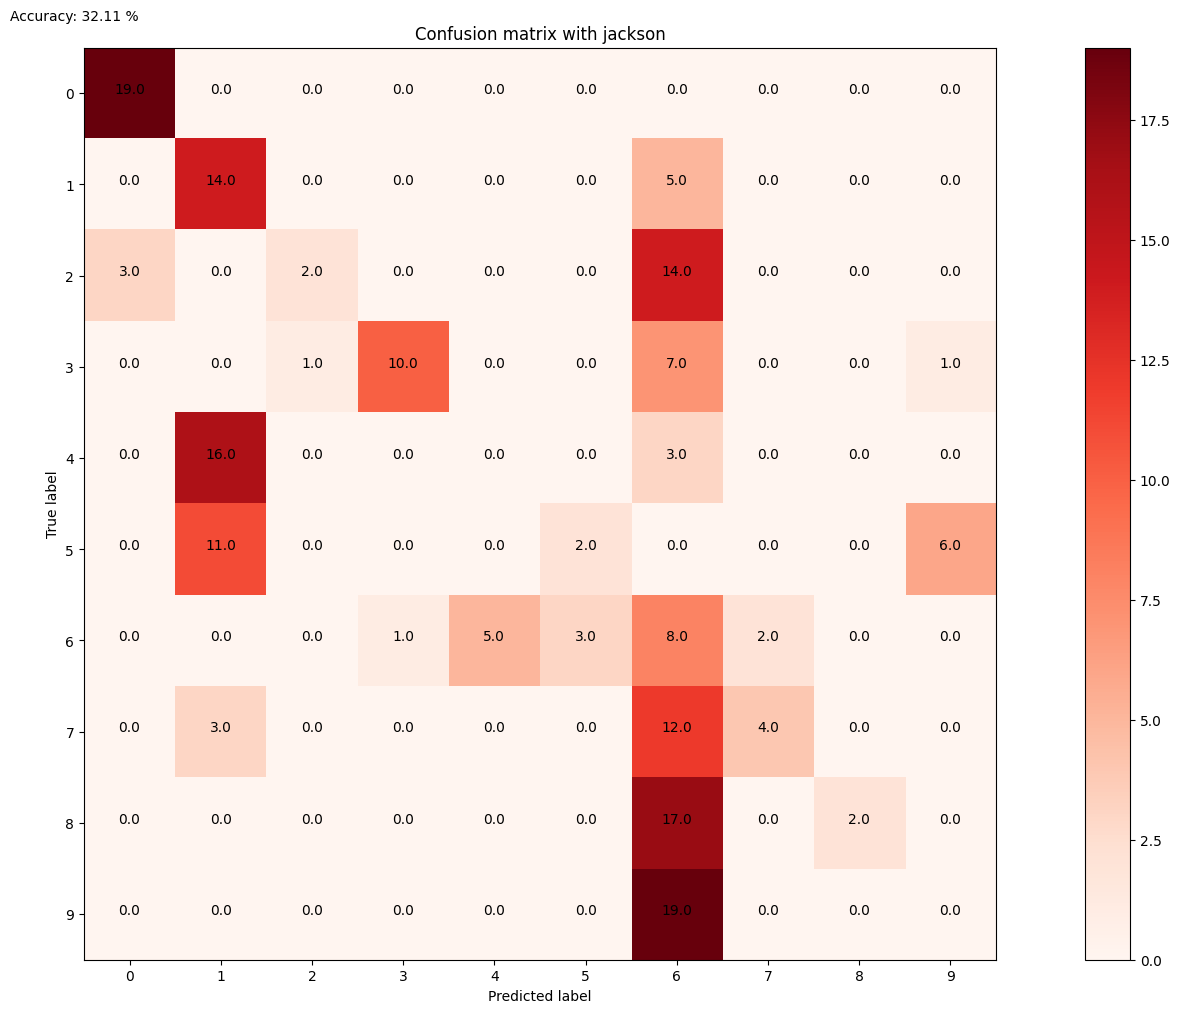

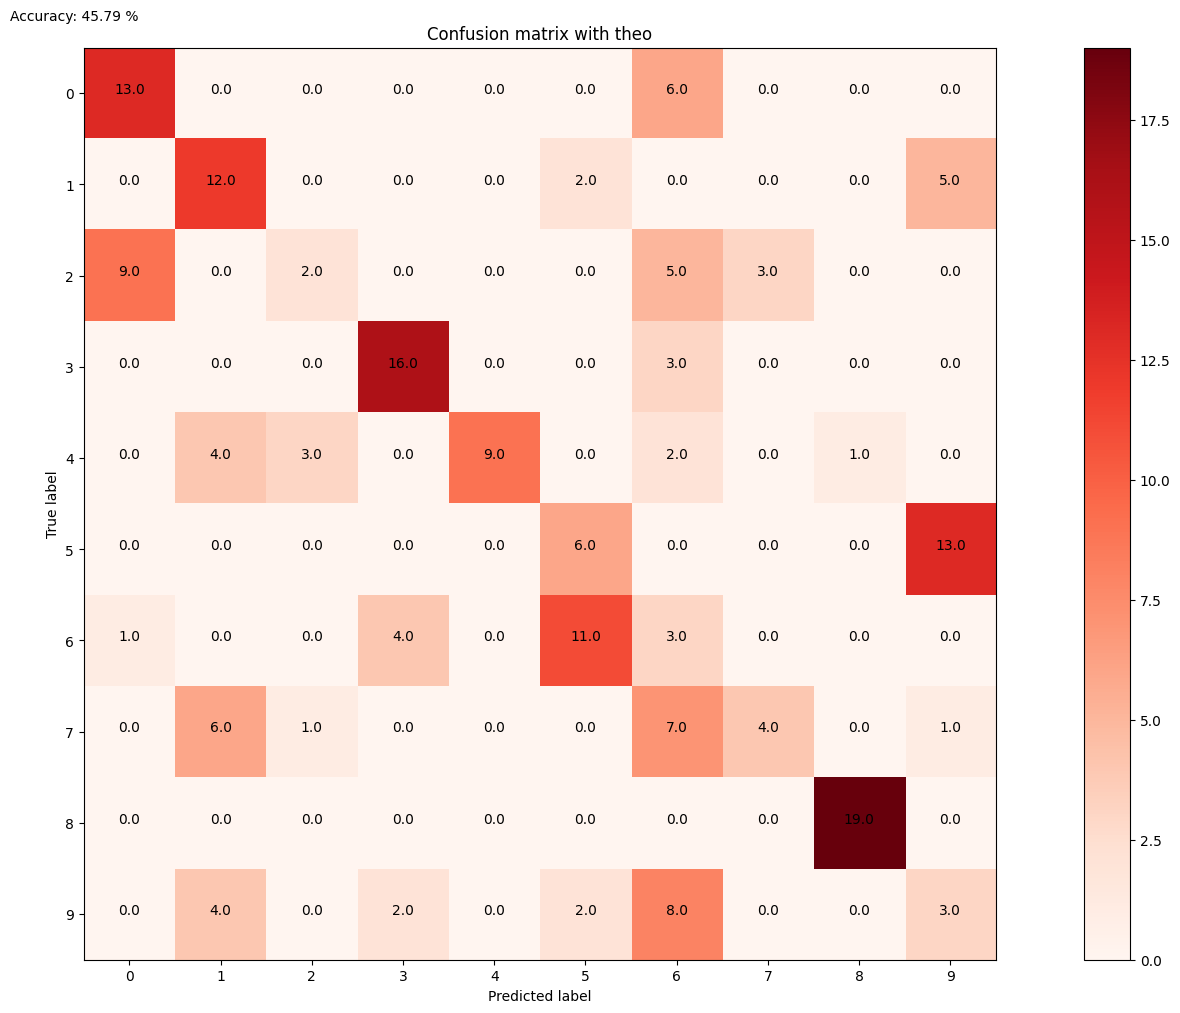

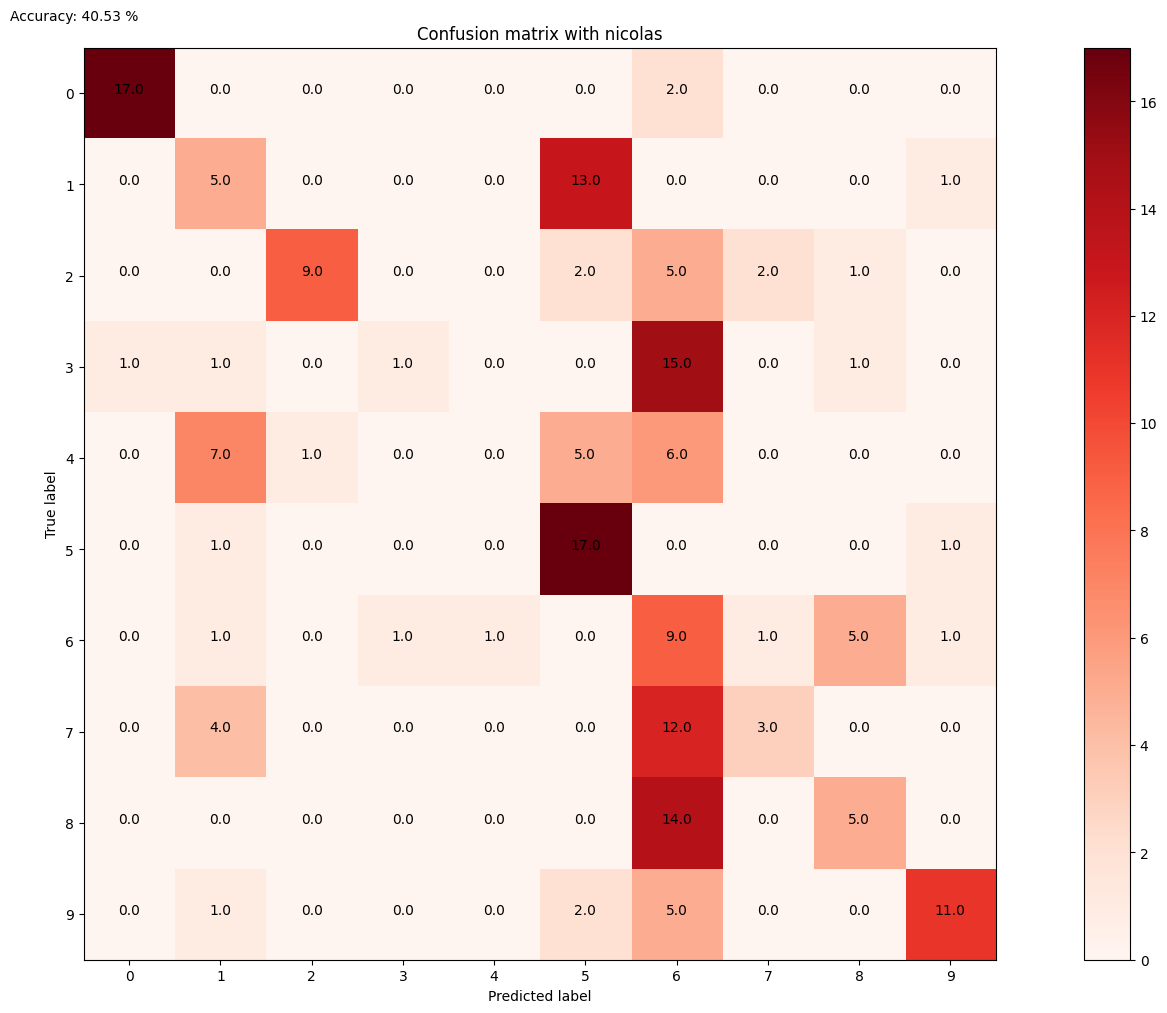

In [ ]:
ndigit=['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak=[ 'jackson']
calculate_accuracy(ndigit, nspeak, digits_features, yweweler_features)


ndigit = ['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak = ['theo']
calculate_accuracy(ndigit, nspeak, digits_features, yweweler_features)


ndigit=['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak=[ 'nicolas']
calculate_accuracy(ndigit, nspeak, digits_features, yweweler_features)

<b> Observations with Yweweler as the speakers for reference</b>

1. In case of Yweweler most of the digits as getting misclassified accuracy too is in the range of 40% only in most cases, telling the fact that Yweweler is a very much different pronounciation of the digits, than the other 3 speakers.

2. **Most confused digits** : Most of the digits are confused, from that also digit 9 and 5 is the most confused and are misclassified as 6 and 9.

3. General Observations: The diagonal elements in a confusion matrix represent correct predictions, where the predicted label matches the true label. Darker squares along the diagonal indicate higher percentages of correct predictions. From the matrices, it appears that Theo has the most number of correct predictions, followed by Nicolas and Jackson.

4. Least accuracy with Jackson shows that the pronounciation from jackson and Yweweler are very much different thatn any other speakers.

(3) WITH REFRENCE SPEAKER AS THEO

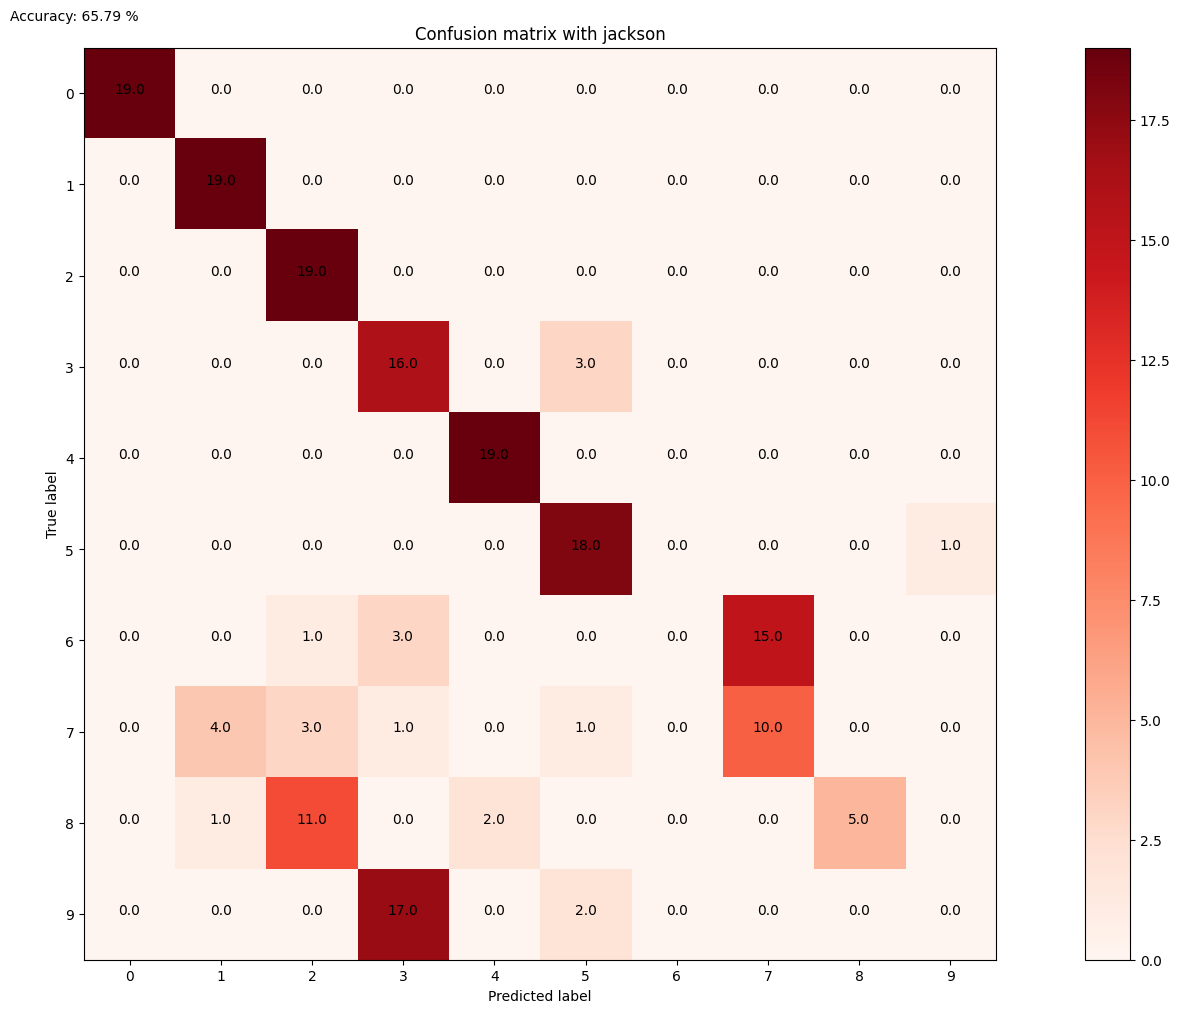

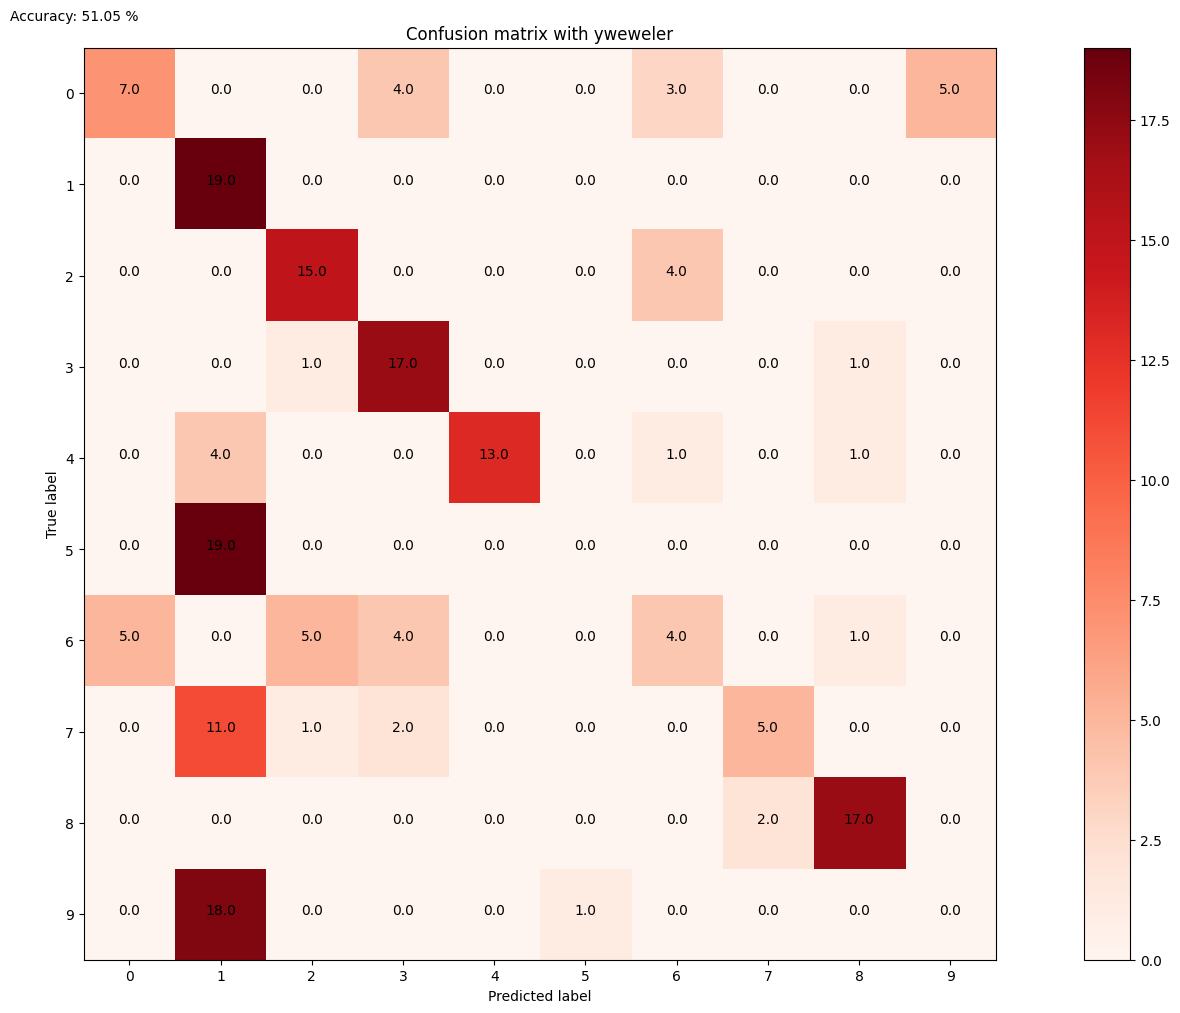

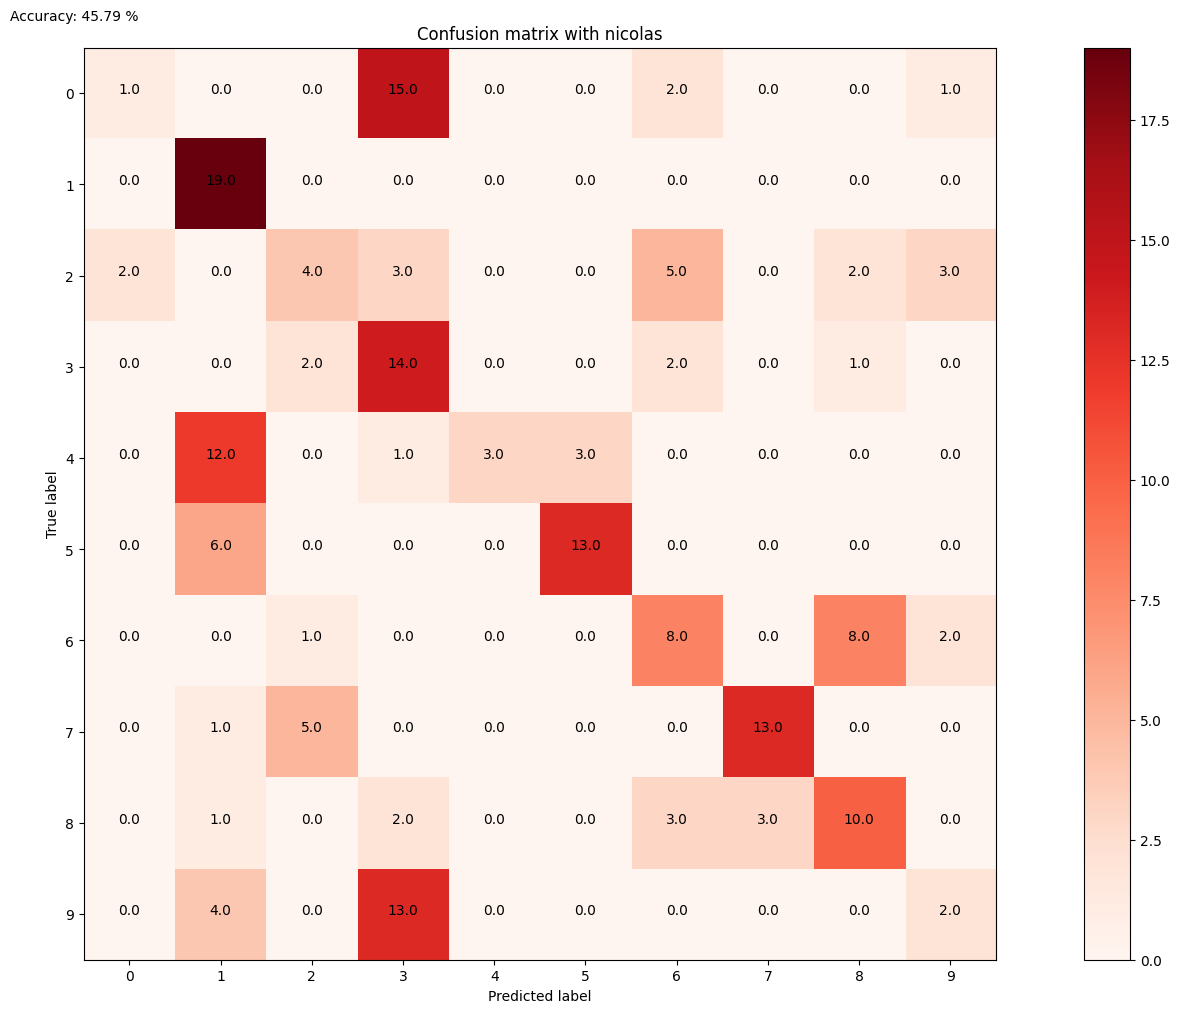

In [ ]:
ndigit=['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak=[ 'jackson']
calculate_accuracy(ndigit, nspeak, digits_features, theo_features)


ndigit=['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak=[ 'yweweler']
calculate_accuracy(ndigit, nspeak, digits_features, theo_features)


ndigit=['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak=[ 'nicolas']
calculate_accuracy(ndigit, nspeak, digits_features, theo_features)

<b> Observations with Theo as the speakers for reference</b>

1. With Theo as the speaker the most closely alligning other speaker is jackson , suggesting that they as more similar digit pronounciations as compared to other speaker.

2. **Most Confused Digits**: As with the previous images, the most confused digits would typically be identified by looking for the non-diagonal cells with the highest values. However, the exact numbers are not visible in the image.

3. General Observations: The diagonal elements in a confusion matrix represent correct predictions, where the predicted label matches the true label. Darker squares along the diagonal indicate higher percentages of correct predictions. From the matrices, it appears that Jackson has the most number of correct predictions, followed by Yweweler and Nicolas.

4. The digit pronounciations of Theo and nicolas matches the least.

(4) WITH REFRENCE SEQUENCE AS NICOLAS

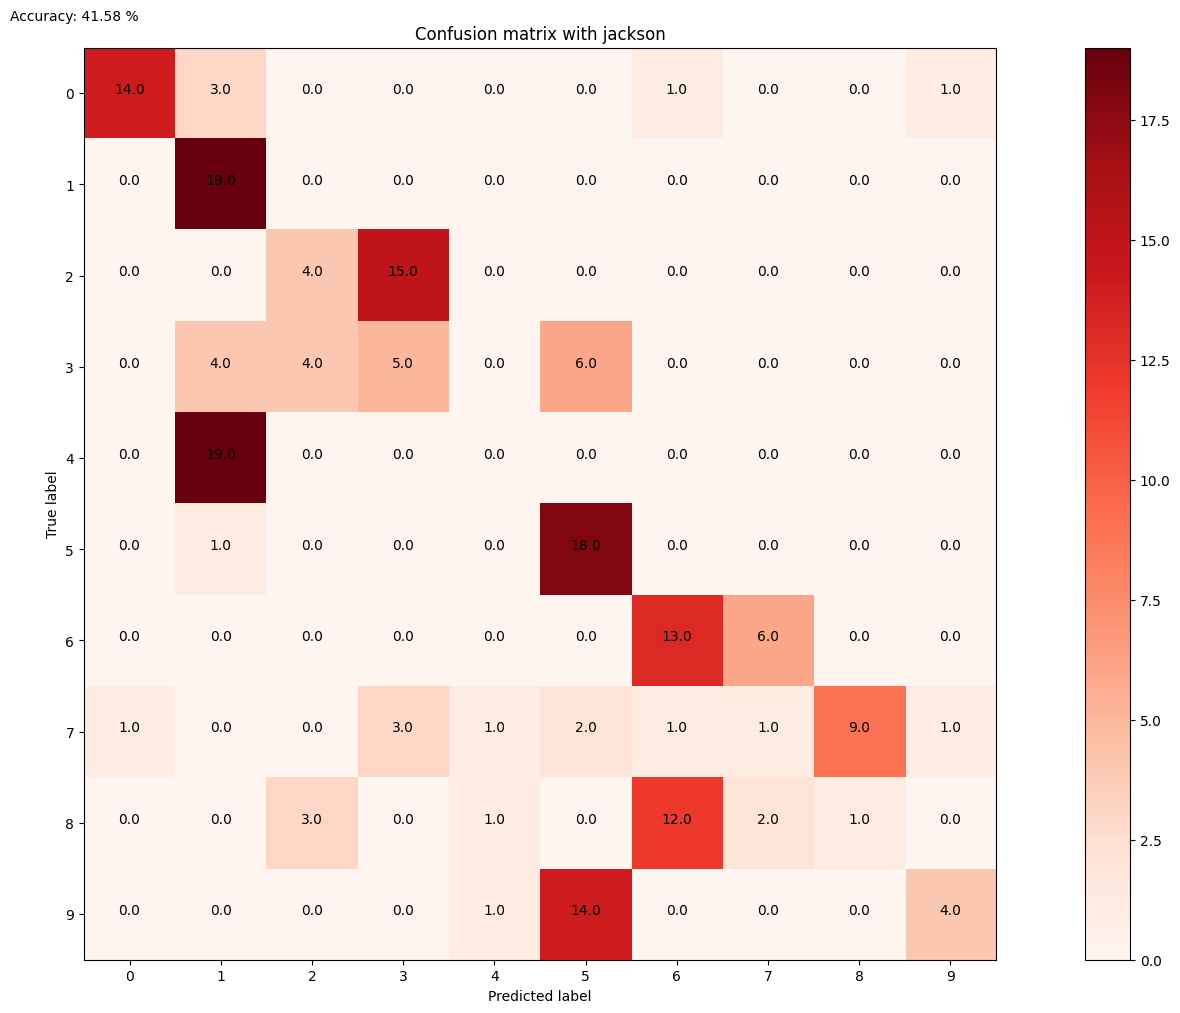

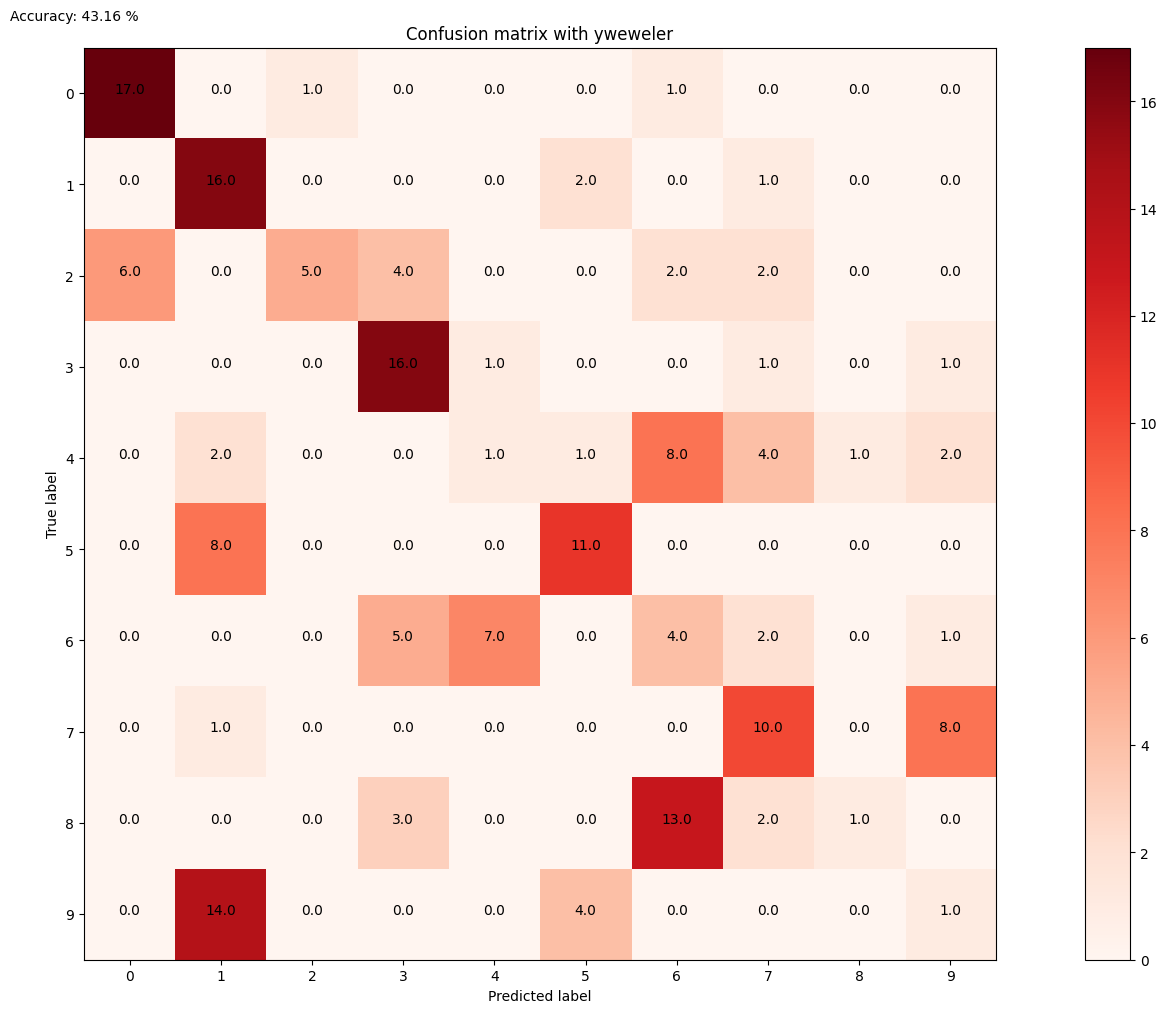

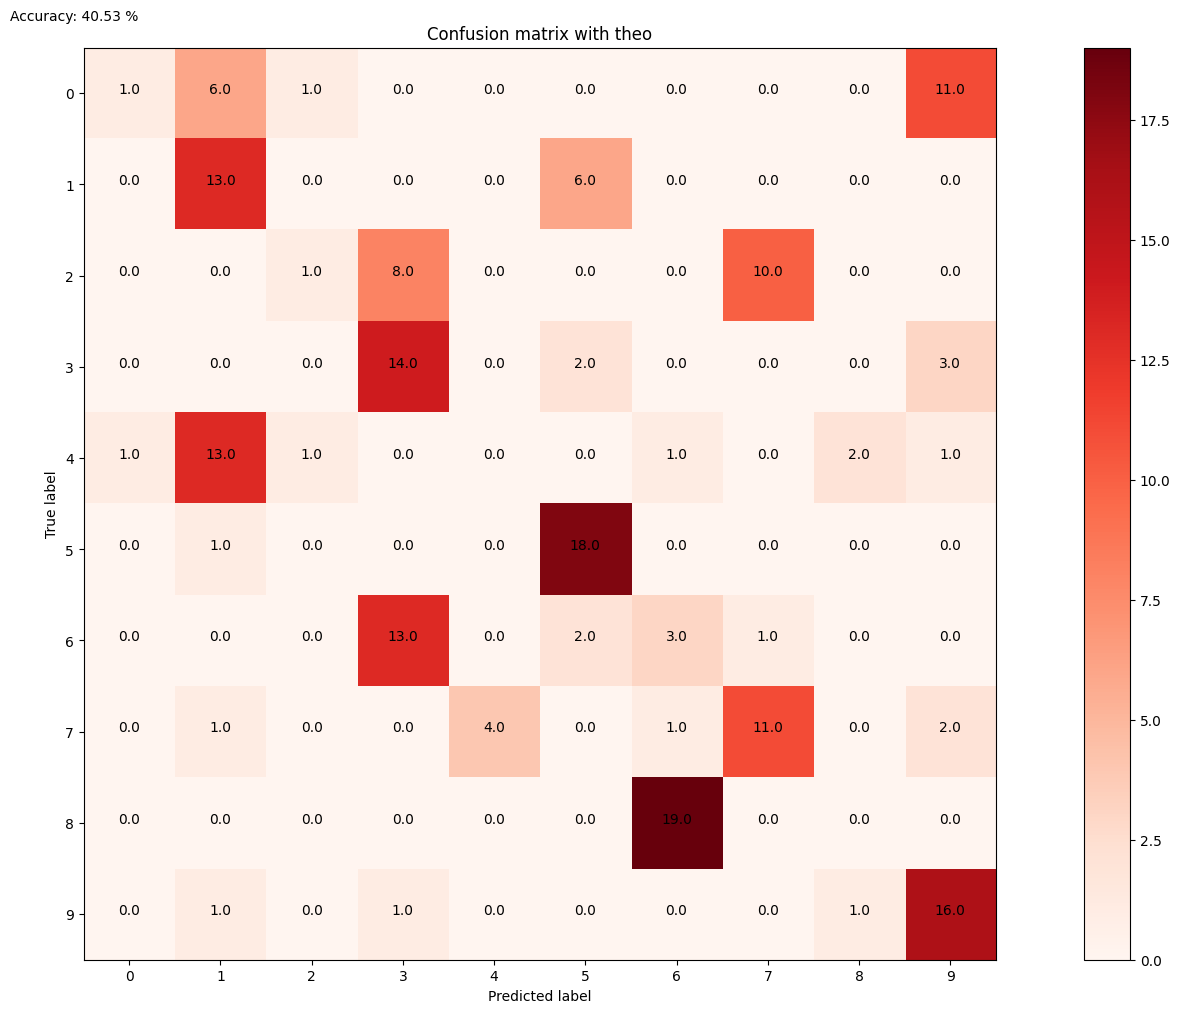

In [ ]:
ndigit=['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak=[ 'jackson']
calculate_accuracy(ndigit, nspeak, digits_features, nicolas_features)


ndigit=['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak=[ 'yweweler']
calculate_accuracy(ndigit, nspeak, digits_features, nicolas_features)


ndigit = ['zeros', 'ones', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
nspeak = ['theo']
calculate_accuracy(ndigit, nspeak, digits_features, nicolas_features)


<b> Observations with Nicolas as the speakers for reference</b>

1. With Nicolas as the speaker the most closely alligning other speaker is yweweler , suggesting that they as more similar digit pronounciations as compared to other speaker.

2. **Most confused digit**: Here also most of the digits have got confused, to be precise the most confused one is 4, 8, 9 that are misclassified as 1, 6, 1 respectively.

3. General Observations: The diagonal elements in a confusion matrix represent correct predictions, where the predicted label matches the true label. Darker squares along the diagonal indicate higher percentages of correct predictions. From the matrices, it appears that Yweweler has the most number of correct predictions, followed by Jackson and Nicolas.

4. The digit pronounciations of Theo and nicolas matches the least.

<b> Overall Observation on different speakers </b>

1. The digits pronounciations of Theo ans Jackson match the most, To be precise the pronounciations from Jackson as more closely alligned to theo than vie-versa, this is clearly depicted from the confusion matrices of (Jackson+theo) and (Theo +Jackson).

2. The digits pronounciations of Yweweler ans Jackson match the least,  this is clearly depicted from the confusion matrices of (Yweweler+theo) and (Theo +Yweweler).

3. In summary we can probabily use JAckson as the refrence sequence to get better accuracy based on the above observations.

In [ ]:
#Suggest some of the changes to improve the system performance.


<b> Some of the changes to improve the system performance. </b>

1.Denoising of the background noises can also get us better results. This probabily includes-

(a) **Time-Domain Filter**s: Filters such as the median filter, Wiener filter, and adaptive filters can be applied directly to the time-domain representation of the audio signal to remove noise.

(b) **Frequency-Domain Filters**: Filters like spectral subtraction, Wiener filtering in the frequency domain, and adaptive filtering techniques can be used to suppress noise components in specific frequency bands.

(c) **Wavelet Thresholding**: Wavelet transform-based denoising techniques apply thresholding to wavelet coefficients to suppress noise while retaining the signal components.

2.Wavelet Transform: Wavelet transforms are used to analyze and process signals in both time and frequency domains simultaneously. They are particularly useful for detecting transient features in audio signals.

3.Cepstral Mean Normalization (CMN): CMN is a technique used to normalize MFCC features by subtracting the mean cepstral vector from each frame's cepstral coefficients. This helps in reducing the effect of speaker and channel variations in speech signals.
In the above problems I have used this method for better results.

4.Kernel Methods: In machine learning, kernels are used to map input data into a higher-dimensional space where it can be linearly separated. In audio processing, kernel methods can be used for tasks like classification, regression, and clustering.

5.Non-negative Matrix Factorization (NMF): NMF is a technique used for decomposing a non-negative matrix into two lower-dimensional matrices. In audio processing, it can be used for source separation and feature extraction.


In [ ]:
!pip install PyWavelets
import numpy as np
import librosa
import pywt
import scipy.signal as signal
from scipy.io import wavfile as wav
from google.colab import drive
import os
from pydub import AudioSegment
from IPython.display import Audio, display
import time
import librosa
import numpy as np
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy

In [ ]:
######################## EXTRA EXPERIMENTS WITH DENOISING  ######################
import pywt

def extract_mfcc2(audio_path, n_mfcc=13):
    # Load audio file
    (rate, sig) = wav.read(audio_path)

    # Apply wavelet thresholding to denoise the signal
    denoised_sig = wavelet_thresholding(sig)

    # Extract MFCC features from the denoised signal
    mfcc_feat = mfcc(denoised_sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming)

    # Apply cepstral mean and variance normalization (CMVN)
    mfcc_feat_cmvn = speechpy.processing.cmvnw(mfcc_feat, win_size=301, variance_normalization=False)

    return mfcc_feat_cmvn

def wavelet_thresholding(sig):
    # Apply wavelet thresholding to denoise the signal
    coeffs = pywt.wavedec(sig, 'db4', level=3)
    threshold = np.std(coeffs[-1]) * 2
    coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    denoised_sig = pywt.waverec(coeffs, 'db4')

    return denoised_sig

In [ ]:
my_refrence2=[]
# Load the dataset
drive.mount('/content/drive', force_remount=True)
mypath = "/content/drive/MyDrive/PRML_Assignments/Assignment_5"

# Iterate over the files and play them sequentially
for i in range(0,10):
    # Load the m4a file
    # Path to the WAV file
    wav_path = os.path.join(mypath, f"digit-{i}.wav")
    my_refrence2.append((extract_mfcc2(wav_path)))

mypath = "/content/drive/MyDrive/PRML_Assignments/Assignment_5/part2_test"

my_zero_test2=[]
# Iterate over the files and play them sequentially
for i in range(1,5):
    wav_path = os.path.join(mypath, f"zero_{i}.wav")
    my_zero_test2.append((extract_mfcc2(wav_path)))

my_one_test2=[]
# Iterate over the files and play them sequentially
for i in range(1,5):
    wav_path = os.path.join(mypath, f"one_{i}.wav")
    my_one_test2.append((extract_mfcc2(wav_path)))

my_two_test2=[]
# Iterate over the files and play them sequentially
for i in range(1,5):
    wav_path = os.path.join(mypath, f"two_{i}.wav")
    my_two_test2.append((extract_mfcc2(wav_path)))

my_three_test2=[]
# Iterate over the files and play them sequentially
for i in range(1,5):
    wav_path = os.path.join(mypath, f"three_{i}.wav")
    my_three_test2.append((extract_mfcc2(wav_path)))

my_four_test2=[]
# Iterate over the files and play them sequentially
for i in range(1,5):
    wav_path = os.path.join(mypath, f"four_{i}.wav")
    my_four_test2.append((extract_mfcc2(wav_path)))

my_five_test2=[]
# Iterate over the files and play them sequentially
for i in range(1,5):
    wav_path = os.path.join(mypath, f"five_{i}.wav")
    my_five_test2.append((extract_mfcc2(wav_path)))

my_six_test2=[]
# Iterate over the files and play them sequentially
for i in range(1,5):
    wav_path = os.path.join(mypath, f"six_{i}.wav")
    my_six_test2.append((extract_mfcc2(wav_path)))

my_seven_test2=[]
# Iterate over the files and play them sequentially
for i in range(1,5):
    wav_path = os.path.join(mypath, f"seven_{i}.wav")
    my_seven_test2.append((extract_mfcc2(wav_path)))

my_eight_test2=[]
# Iterate over the files and play them sequentially
for i in range(1,5):
    wav_path = os.path.join(mypath, f"eight_{i}.wav")
    my_eight_test2.append((extract_mfcc2(wav_path)))

my_nine_test2=[]
# Iterate over the files and play them sequentially
for i in range(1,5):
    wav_path = os.path.join(mypath, f"nine_{i}.wav")
    my_nine_test2.append((extract_mfcc2(wav_path)))

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [ ]:
#refrence sequence
refrence2 = [my_zero_test2[0], my_one_test2[0], my_two_test2[0], my_three_test2[0], my_five_test2[0],
       my_five_test2[0], my_six_test2[0], my_seven_test2[0], my_eight_test2[0], my_nine_test2[0]]

# Initialize confusion matrix
cmatrix2 = np.zeros((10, 10))

# List of test sets for each digit
test_sets2 = [my_zero_test2, my_one_test2, my_two_test2, my_three_test2, my_four_test2,
             my_five_test2, my_six_test2, my_seven_test2, my_eight_test2, my_nine_test2]

def calculate_dtw(test_samples, refrence, digit_idx):
    for test_sample_idx, test_sample in enumerate(test_samples, start=0):
        dist = []
        for ref in refrence:
            # test_sample = (test_sample-np.mean(test_sample))/np.std(test_sample)
            # ref = (ref-np.mean(ref))/np.std(ref)
            matrix, distance, path = VectorDTW(test_sample, ref,'manhattan')
            dist.append(distance)
        recognized_digit = np.argmin(dist)
        cmatrix2[digit_idx, recognized_digit] += 1

# Iterate over all digit classes
for digit_idx, test_set in enumerate(test_sets2):
    calculate_dtw(test_set, refrence2, digit_idx)

total_samples2 = np.sum(cmatrix2)
correct_predictions2 = np.trace(cmatrix2)
accuracy2 = correct_predictions2 / total_samples2
# Display

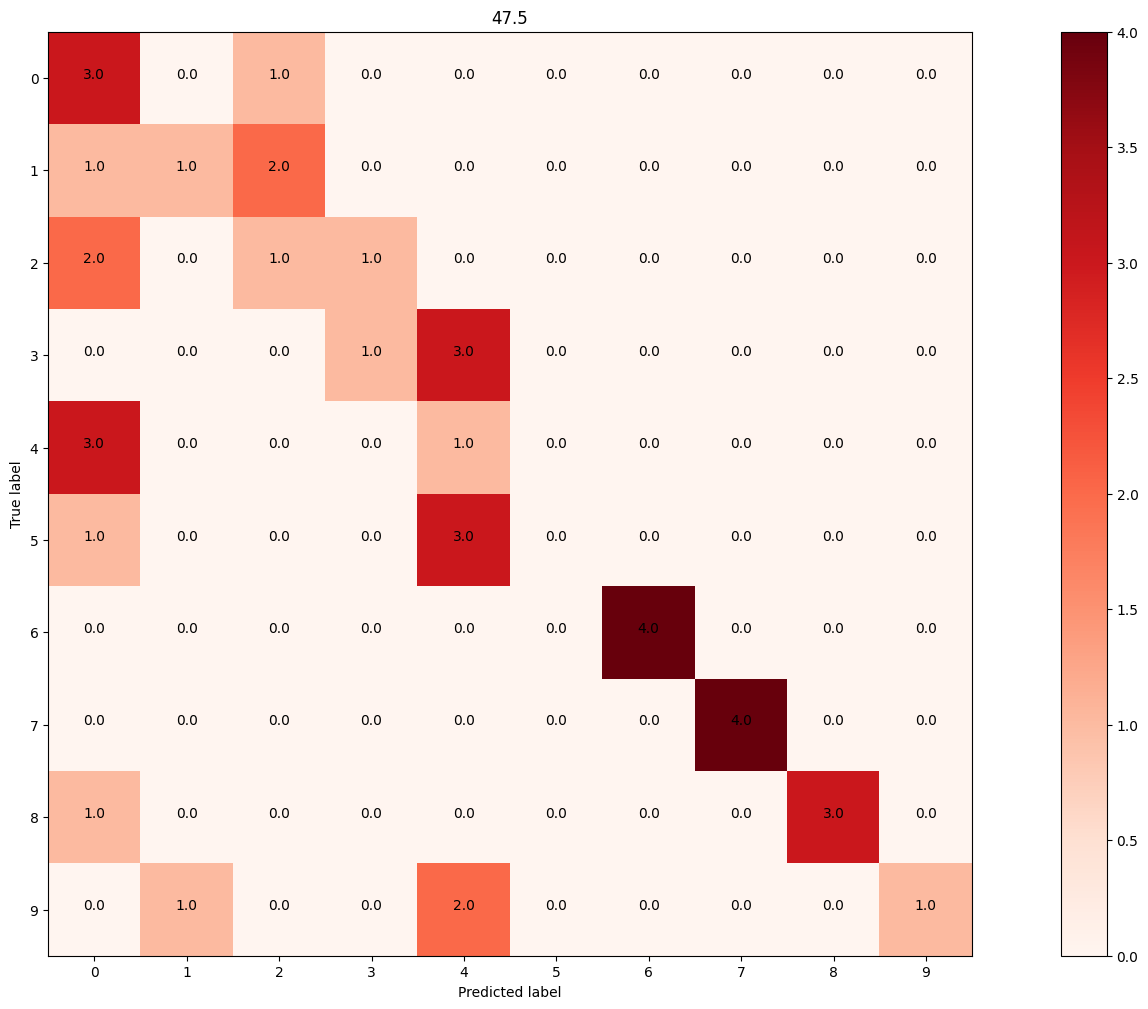

In [ ]:
plot_confusion_matrix(cmatrix2,accuracy2*100)